In [1]:
# import required libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Gathering

In [ ]:
url = "https://bikekharido.in/used-bikes-in-india/"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.162 Safari/537.36"
}
response = requests.get(url,headers)

In [ ]:
soup = BeautifulSoup(response.text,"lxml")

In [ ]:
# name of bike
soup.find_all('h2',class_ = "fl-post-title-old bikeListHead")

In [ ]:
#price of bike 
soup.find_all(class_ = "fw500 spanblock fsize17 fcblack")

In [ ]:
page_length = 24

In [ ]:
#other info about the bikes
soup.find_all(class_ = "boxlabel imptags")

In [ ]:
# Separate lists for each attribute
bike_names = []
bike_prices = []
bike_km = []
bike_ownership = []
bike_location = []

# Loop through all 54 pages
for page in range(1, 55):
    url = f"https://bikekharido.in/used-bikes-in-india/?sf_paged={page}"
    print(f"Scraping page {page}...")

    response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    soup = BeautifulSoup(response.text, "html.parser")

    # --- Bike names ---
    names = [n.get_text(strip=True) for n in soup.find_all("h2", class_="fl-post-title-old bikeListHead")]
    bike_names.extend(names)

    # --- Prices ---
    prices = [p.get_text(strip=True) for p in soup.find_all(class_="fw500 spanblock fsize17 fcblack")]
    bike_prices.extend(prices)

    # --- Km driven, ownership, location ---
    tags = [t.get_text(strip=True) for t in soup.find_all(class_="boxlabel imptags")]

    for i in range(0, len(tags), 3):
        detail = tags[i:i+3]
        while len(detail) < 3:
            detail.append("NA")  # fill missing data if any
        bike_km.append(detail[0])
        bike_ownership.append(detail[1])
        bike_location.append(detail[2])

# Check lengths
print(len(bike_names), len(bike_prices), len(bike_km), len(bike_ownership), len(bike_location))


In [ ]:
# creating Dataframe from those lists 
df = pd.DataFrame({
    "Name": bike_names,
    "Price": bike_prices,
    "Km_Driven": bike_km,
    "Ownership": bike_ownership,
    "Location": bike_location
})

df.tail()

### 1. Summary of the Dataset

The dataset contains information on used bikes listed in India from the website Bikekharido. A total of all bikes scraped entries were collected, including details like bike name, price, kilometers driven, ownership type, and location.

The prices of bikes vary widely, ranging from very low-cost options to premium models. Most bikes have been driven for a few thousand kilometers, though some have higher usage. Regarding ownership, the majority of bikes are first or second-hand, while a few listings indicate multiple owners.

In terms of locations, bikes are listed from multiple cities across India, with some cities having more listings than others. Overall, this dataset provides a clear view of the used bike market in India, including price trends, usage patterns, and distribution across locations, which can be useful for buyers, sellers, or market analysis.

### 2. Columns Description

| Column Name    | Description                                                                |
| -------------- | -------------------------------------------------------------------------- |
| **Name**       | The name and model of the bike as listed on the website.                   |
| **Price**      | The listed selling price of the bike, usually in Indian Rupees (₹).        |
| **Km\_Driven** | Total distance the bike has been driven, usually in kilometers.            |
| **Ownership**  | Indicates how many previous owners the bike has had (e.g., First, Second). |
| **Location**   | The city or region where the bike is currently listed or available.        |


## Data Assessing

### Types of Assessment
There are 2 types of assessment styles

- `Manual` - Looking through the data manually in google sheets
- `Programmatic` - By using pandas functions such as info(), describe() or sample()

### Steps in Assessment
There are 2 steps involved in Assessment

- Discover
- Document

In [ ]:
#importing to an excel file for manual assessment
df.to_excel('bikes.xlsx',index=False)

## Issues with Dataset

#### 1. Dirty Data (Data with Quality issues)

    - Price column contains the '₹' symbol.
    - Km_Driven column contains the text 'km'.
    - Duplicate entries are present in the dataset.
    - Incorrect data types for Km_Driven and Price columns.
    - For rows 1041 & 1053, Manufactured_year is misplaced at the end of the row.
    - For row 730 in Km_driven col only 'km' text is present without the number

#### 2. Messy Data (Data with tidiness issues)

    - Name column contains information about the manufactored year, brand & model. 
    - Name column also contains information wheather its EV or not

In [ ]:
#making a copy of the dataset
bike_data = df.copy()

In [ ]:
#Programatic assessment
df.info()

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.duplicated()

In [ ]:
df[df['Name'] == '2017 Bajaj Pulsar NS160 STD']

In [ ]:
df[df['Name'] == '2019 Royal Enfield Interceptor 650 Baker Express']

In [ ]:
df.isnull().sum()

## Data Cleaning

**steps involved in Data Cleaning :** 
- Define
- Code
- Test

##### Define
- split the name column into three different columns Registration year, Bike brand & model
- checks wheather a bike is Ev or normal

In [ ]:
#code
df['Registration_year'] = df['Name'].str.split(' ').str.get(0)

In [4]:
# Show all rows
pd.set_option('display.max_rows', None)

# If you also want to show all columns
pd.set_option('display.max_columns', None)


In [ ]:
df.loc[df[df['Registration_year'] == "KTM"].index,"Manufactored_year"] = 'Not Mentioned'

In [ ]:
df['Registration_year'].value_counts()

In [ ]:
df['Brand'] = df['Name'].str.split(' ').str.get(1)

In [ ]:
df['Model'] = df['Name'].str.split(n=2).str.get(2)

In [ ]:
df.head()

In [ ]:
df["Brand"] = df['Brand'].apply(lambda x: 'Royal Enfield'if x == 'Royal' else x)

In [ ]:
df['Model'] = df['Model'].str.replace('Enfield','')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
temp_df = df[(df['Name'].str.contains('Electric | EV')) & (~df['Name'].str.contains('Electric Start'))]

In [ ]:
df['Type'] = 'Petrol'

df.loc[temp_df.index,'Type'] = 'EV'

In [ ]:
df.loc[df[df['Brand'] == '125'].index,'Brand'] = 'KTM'

In [ ]:
df.iloc[1041,:]

In [ ]:
#for cols 1041 and 1053 manufactored year is in last. placing it in Manufactored year column
df.loc[df[df['Name'] == 'KTM 125 Duke 2021'].index,'Manufactored_year'] = '2021'

In [ ]:
df['Registration_year'].value_counts()

In [ ]:
df['Model'].value_counts()

In [ ]:
df[df['Model'] == 'CT100 Spoke BS4']

In [ ]:
#droping the Name cols and re-aranging the cols 
df = df[['Registration_year','Brand','Model','Type','Price','Km_Driven','Ownership','Location']]

In [ ]:
df.head()

#### Define

- Convert Price and Km_Driven columns to numeric by removing special characters (₹, km).
- handle the rows with only 'km' text make them NaN

In [ ]:
#code
df['Price'] = df['Price'].str.replace('₹','').str.replace(',','').astype('int32')

In [ ]:
#code
df.loc[df[df['Km_Driven'] == 'km'].index,'Km_Driven'] = np.nan

In [ ]:
#converting the col to int
df['Km_Driven'] = df['Km_Driven'].str.replace('km','').str.strip().astype('Int32')

In [ ]:
#test
df.info()

#### Define

- Removing the duplicate Entries

In [ ]:
df.drop_duplicates(keep='first',ignore_index=True,inplace=True)

In [ ]:
df.shape

In [ ]:
df.info()

#### Define

- Handling the null values 

In [ ]:
#code
df[df.isnull().any(axis=1)]

In [ ]:
df[df['Model'] == "CB Unicorn 160 Disc Brake"]

In [ ]:
df['Km_Driven'] = df.groupby(by=['Brand','Model'])['Km_Driven'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
df['Km_Driven'].isnull().sum()

In [ ]:
df.info()

In [ ]:
df.head()

In [85]:
df.to_csv('cleaned_bike_data.csv',index=False)

In [2]:
#importing the cleaned dataset

df = pd.read_csv("cleaned_bike_data.csv")

In [3]:
df.head()

,Registration_year,Brand,Model,Type,Price,Km_Driven,Ownership,Location
0,2022,Hero,Passion Pro i3s Disc Alloy,Petrol,55000,30000,First,Bangalore
1,2017,Bajaj,Pulsar NS160 STD,Petrol,40000,27500,Third,Delhi
2,2017,Bajaj,Pulsar NS200 STD BS4,Petrol,55000,66850,First,Hyderabad
3,2017,Bajaj,Dominar 400 (2016-2018) ABS,Petrol,110000,35000,First,Jodhpur
4,2017,Royal Enfield,Classic 350 Redditch Series With Single-Channel,Petrol,145000,50000,First,Bangalore


## EDA

### Column Types

- **Numerical** - Price, Km_Driven
- **Categorical** - Registration_year, Brand, Ownership, Location, Type, Model(High Cardinality)

### Univariate Analysis

#### Price

**Intial Observation**

- Range: 10000 - 850000
- The data is highly(positively) skewed
- Outliers observed in the data because of High-end Superbikes and one commuter bike(Splender at 8.5lakh)

**Oultier inspection** 

- Superbikes like (Ducati, BMW, Harley) --> valid, required for analysis
- Hero Splender at 8.5 Lakh is unrealistic, should be removed cause its a data error

**Data Cleaning**

- The Hero Splendor Plus i3s was incorrectly listed as ₹8.5 lakh. Since this is unrealistic compared to similar Splendor bikes (~₹60k–₹80k), we replaced it with the mean price of all Splendor bikes with First Ownership

**Conclusions**

- Price distribution remains right-skewed, mainly because of superbikes, which is expected and valid
  

In [4]:
df['Price'].describe()

count       636.000000
mean      96647.199686
std       75574.207842
min       10000.000000
25%       45000.000000
50%       75000.000000
75%      140000.000000
max      685000.000000
Name: Price, dtype: float64

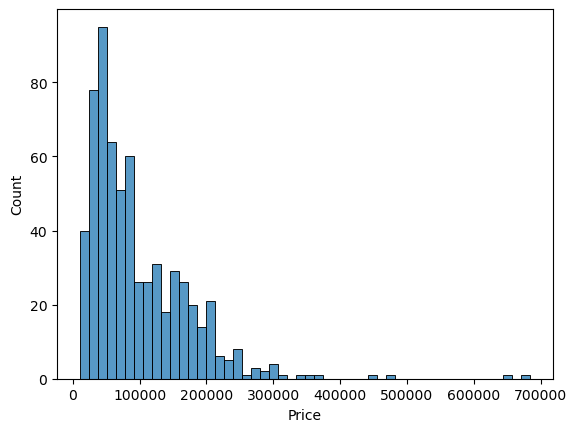

In [5]:
sns.histplot(df['Price'],bins=50)
plt.show()

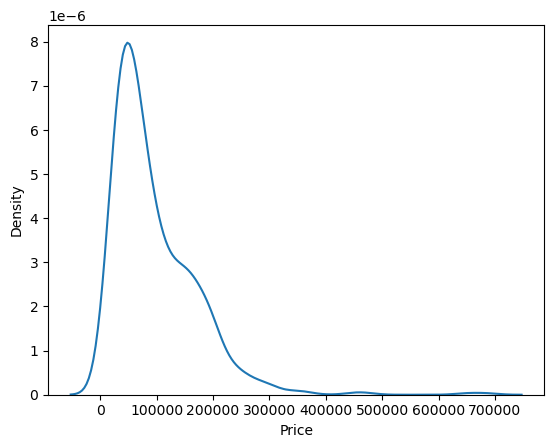

In [4]:
sns.kdeplot(df['Price'])
plt.show()


In [5]:
df['Price'].skew()

2.373787680216581

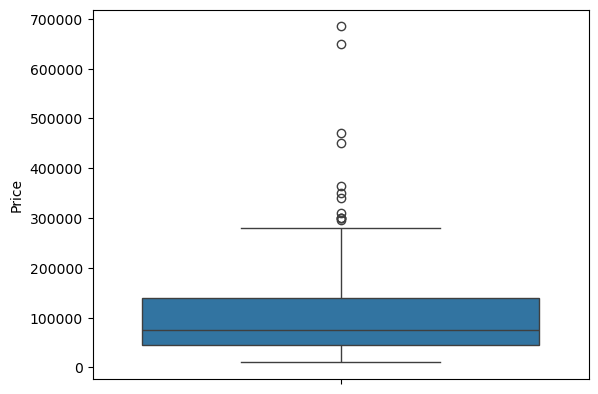

In [6]:
sns.boxplot(df['Price'])
plt.show()

In [7]:
#Examining Outliers using IQR method

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

In [8]:
df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

,Registration_year,Brand,Model,Type,Price,Km_Driven,Ownership,Location
59,2023,Kawasaki,Ninja 300,Petrol,365000,1125,First,Mumbai
66,2019,Harley-Davidson,Street 750 BS6,Petrol,350000,10000,First,Pune
100,2019,Benelli,TNT 600i BS4 ABS BS4,Petrol,470000,20000,Third,Delhi
118,2015,Ducati,Monster 795 STD,Petrol,685000,19200,Second,Delhi
173,2016,Hyosung,GV650 Aquila Pro STD,Petrol,295000,10000,First,Visakhapatnam
199,2018,Harley-Davidson,Street 750 STD,Petrol,450000,15000,Second,Bangalore
235,2015,Benelli,TNT 600i BS4 Limited Edition,Petrol,340000,35000,Second,Coimbatore
241,2022,BMW,G 310 RR Style Sport,Petrol,310000,10000,First,Delhi
343,2022,Kawasaki,Z650RS,Petrol,650000,800,First,Delhi
404,2021,BMW,G 310 GS,Petrol,300000,5000,First,Guwahati


In [ ]:
temp = df[df['Price'] == 850000]
df.loc[temp.index,'Price'] = np.nan

In [ ]:
splendor_mean = df[(df['Model'].str.contains("Splendor")) & (df['Ownership'] == 'First')]['Price'].mean()
df.loc[temp.index,"Price"] = int(splendor_mean)

In [ ]:
df['Price'] = df['Price'].astype('Int64')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Registration_year  636 non-null    object
 1   Brand              636 non-null    object
 2   Model              636 non-null    object
 3   Type               636 non-null    object
 4   Price              636 non-null    int64 
 5   Km_Driven          636 non-null    int64 
 6   Ownership          636 non-null    object
 7   Location           636 non-null    object
dtypes: int64(2), object(6)
memory usage: 39.9+ KB


In [6]:
#plotting the graphs again to see changes
df['Price'].describe()

count       636.000000
mean      96647.199686
std       75574.207842
min       10000.000000
25%       45000.000000
50%       75000.000000
75%      140000.000000
max      685000.000000
Name: Price, dtype: float64

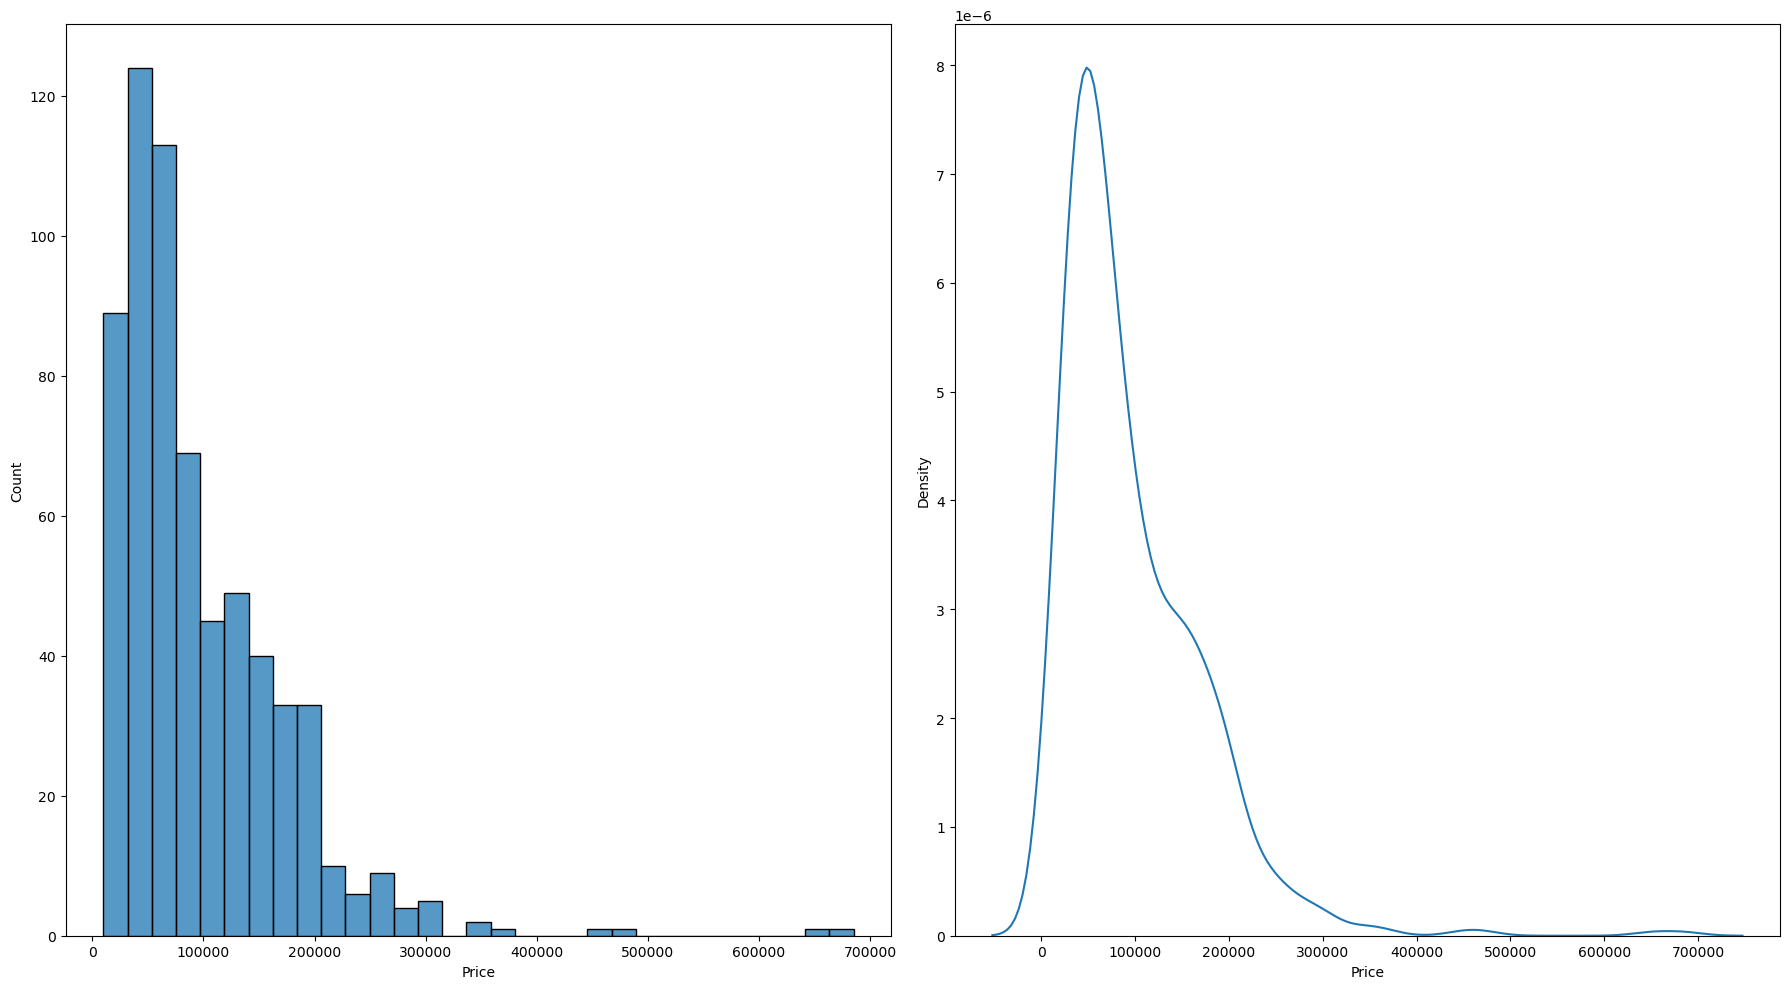

In [7]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,10))
sns.histplot(df['Price'],ax=ax[0])
sns.kdeplot(df['Price'],ax=ax[1])
plt.tight_layout()
plt.show()


### Km_Driven

 **Initial Observation**

- Range: 273 km – 200,000 km
- The data is positively skewed.
- Outliers are clearly observed in the higher mileage range.

**Outlier Inspection**

- Few bikes with extremely high usage (close to 200,000 km).
- These may be genuine high-usage cases (older or commercial bikes) rather than just errors.

**Data Cleaning**

- Outliers were not removed, as data is from a real listing website and could represent actual cases.
- Keeping them ensures dataset authenticity and avoids information loss.

**Insights**

- Majority of bikes fall in the 20,000 – 80,000 km range, representing typical resale mileage.
- Very high-mileage bikes (>120,000 km) are rare but indicate long-term usage or commercial use.
- Buyers likely prefer low to mid-range mileage bikes, reinforcing market demand for less-used vehicles.

In [71]:
df['Km_Driven'].describe()

count       636.000000
mean      26125.721698
std       22911.935438
min         273.000000
25%       10000.000000
50%       20000.000000
75%       35000.000000
max      200000.000000
Name: Km_Driven, dtype: float64

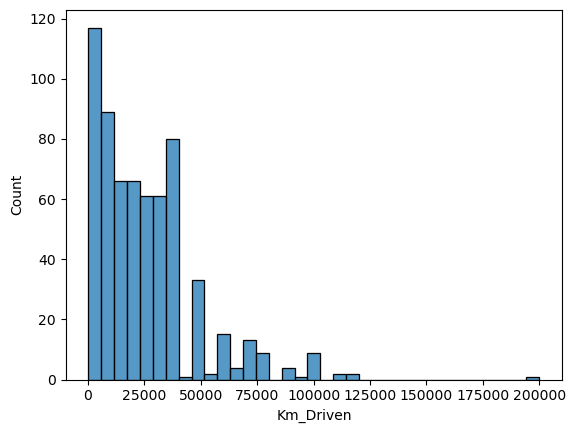

In [72]:
sns.histplot(df['Km_Driven'])
plt.show()

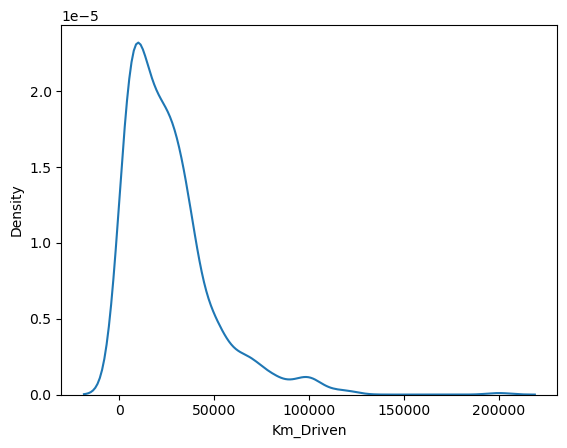

In [73]:
sns.kdeplot(df['Km_Driven'])
plt.show()

In [74]:
#Examining Outliers using IQR method

Q1 = df['Km_Driven'].quantile(0.25)
Q3 = df['Km_Driven'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

In [75]:
outliers = df[(df['Km_Driven'] < lower_bound) | (df['Km_Driven'] > upper_bound)]

In [76]:
outliers

,Registration_year,Brand,Model,Type,Price,Km_Driven,Ownership,Location
22,2021,KTM,250 Duke STD,Petrol,160000,90000,Second,Delhi
33,2014,Royal Enfield,Bullet 350 ES ABS BS4,Petrol,110000,120000,Above,Hubballi-Dharwad
34,2012,Yamaha,FZ S FI (V 2.0) Dual Disc,Petrol,40000,80000,First,Hyderabad
81,2016,Hero,Ignitor 125 Drum,Petrol,25000,90000,Third,Guwahati
83,2023,Hero,Splendor Plus i3s,Petrol,57285,90000,First,Bangalore
102,2011,Bajaj,Discover 100 M,Petrol,20000,100000,First,Dhule
147,2017,Yamaha,FZ S FI (V 2.0) STD,Petrol,35000,110000,First,Hyderabad
150,2018,TVS,Apache RTR 160 4V Carburetor Single Disc (2018),Petrol,55000,100000,First,Delhi
196,2011,Hero,Honda Splendor Pro,Petrol,30000,100000,First,Pune
208,2011,Hero,Honda CD Dawn,Petrol,10000,100000,Second,Hyderabad


### Registration Year

**intial_obseravtions**

- Registration_year contains the valid values of year from (2007 to 2024)
- One data validity issue a row contains "KTM" instead of year (index : 524)

**Data Cleaning**

- Replacing the value "KTM" with "2021" for row: 524, whose  registration_year 2021 was present in the "Model" column

**Insights**

- Most bikes are from 2017–2022, with 2021–22 dominating the resale market. Very few older bikes (pre-2015) are listed, showing strong demand for newer models.

In [77]:
df['Registration_year'].value_counts()

Registration_year
2021    90
2022    86
2018    66
2017    53
2016    52
2019    49
2020    47
2023    46
2015    32
2014    31
2013    25
2012    18
2011    17
2010    13
2024     4
2009     4
2007     2
KTM      1
Name: count, dtype: int64

In [78]:
df.loc[524,'Registration_year'] = '2021'

In [79]:
df['Registration_year'].value_counts()

Registration_year
2021    91
2022    86
2018    66
2017    53
2016    52
2019    49
2020    47
2023    46
2015    32
2014    31
2013    25
2012    18
2011    17
2010    13
2024     4
2009     4
2007     2
Name: count, dtype: int64

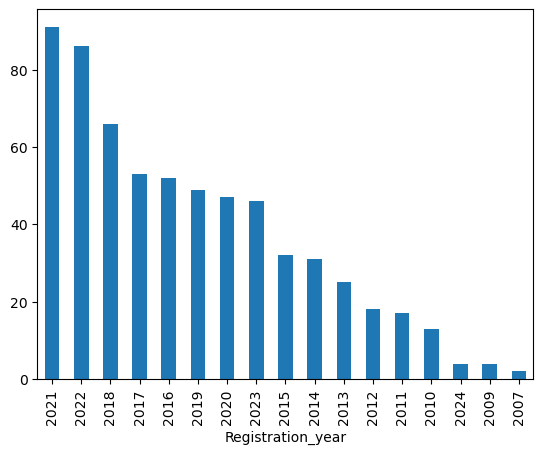

In [80]:
# plotting bar plot for Registration_year's value_counts
df['Registration_year'].value_counts().plot(kind='bar')
plt.show()

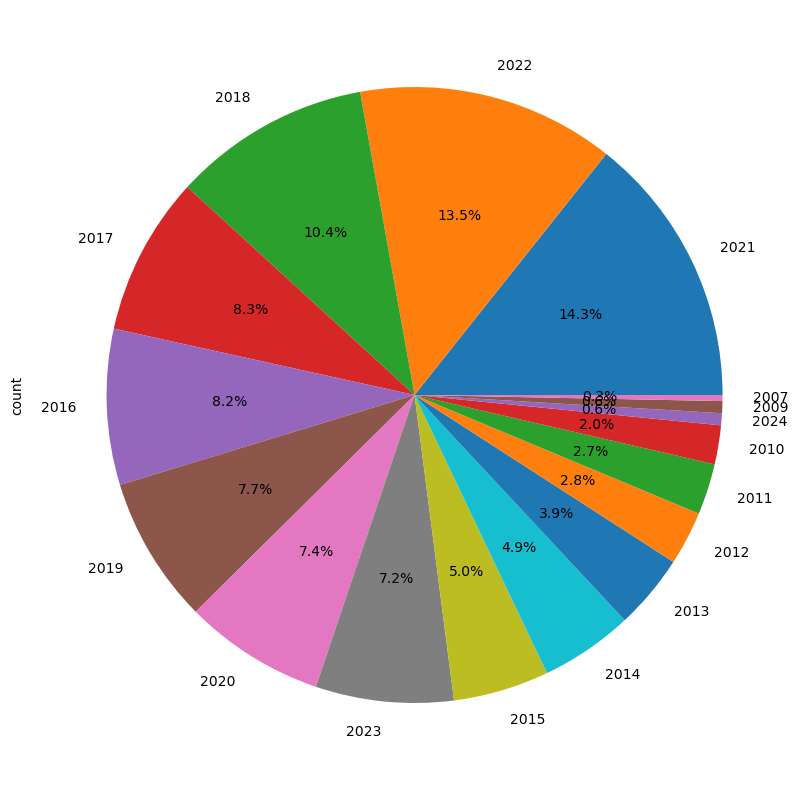

In [81]:
# plotting bar plot for Registration_year's value_counts
plt.figure(figsize=(10,10))
df['Registration_year'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.show()

### Ownership

**intail_observations**

- Most of the bikes are First Ownership, some are Second Ownership, and only 16 bikes are Third Ownership & 5 bikes are Fourth+ Ownership(Above)

In [17]:
df['Ownership'].value_counts()

Ownership
First     529
Second     86
Third      16
Above       5
Name: count, dtype: int64

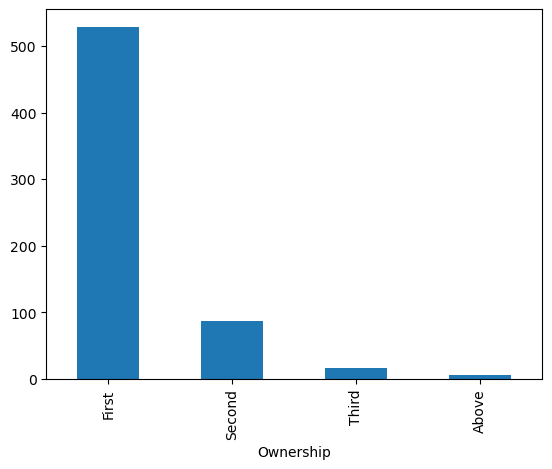

In [18]:
df['Ownership'].value_counts().plot(kind="bar")
plt.show()

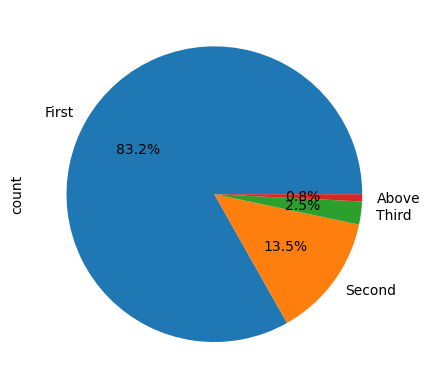

In [19]:
df['Ownership'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.show()

### Brand 

**intail_observations**

- The dataset is dominated by Bajaj (106 bikes), Honda (100), and Royal Enfield (92), which together make up a large share of the listings.
- Mid-range presence includes TVS (70), Hero (64), Yamaha (52), and Suzuki (35).
- Premium and niche brands such as KTM (25), Jawa (17), and Yezdi (12) also appear with moderate frequency.
- Several international and electric brands like BMW, Harley-Davidson, Ducati, Revolt, Ola, Okinawa, etc. are present, but with very few entries (1–4 each).
- Overall, the dataset is skewed toward mass-market Indian brands, with only a handful of listings for luxury or electric two-wheelers.

In [20]:
df['Brand'].value_counts()

Brand
Bajaj              106
Honda              100
Royal Enfield       92
TVS                 70
Hero                64
Yamaha              52
Suzuki              35
KTM                 25
Jawa                17
Yezdi               12
Vespa               11
Aprilia              7
Revolt               6
Benelli              4
Hyosung              4
Mahindra             4
Kawasaki             3
BMW                  3
Husqvarna            2
Ola                  2
Harley-Davidson      2
UM                   2
PURE                 2
Triumph              2
Odysse               1
Benling              1
Ducati               1
BGauss               1
Okaya                1
Okinawa              1
Tunwal               1
Komaki               1
Ampere               1
Name: count, dtype: int64

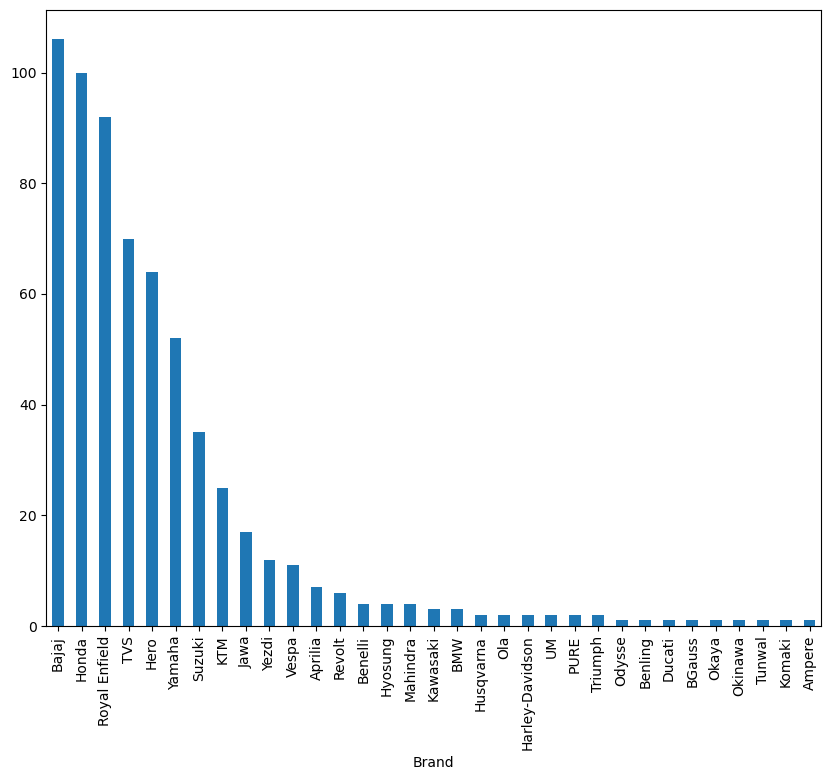

In [21]:
plt.figure(figsize=(10,8))
df['Brand'].value_counts().plot(kind="bar")
plt.show()

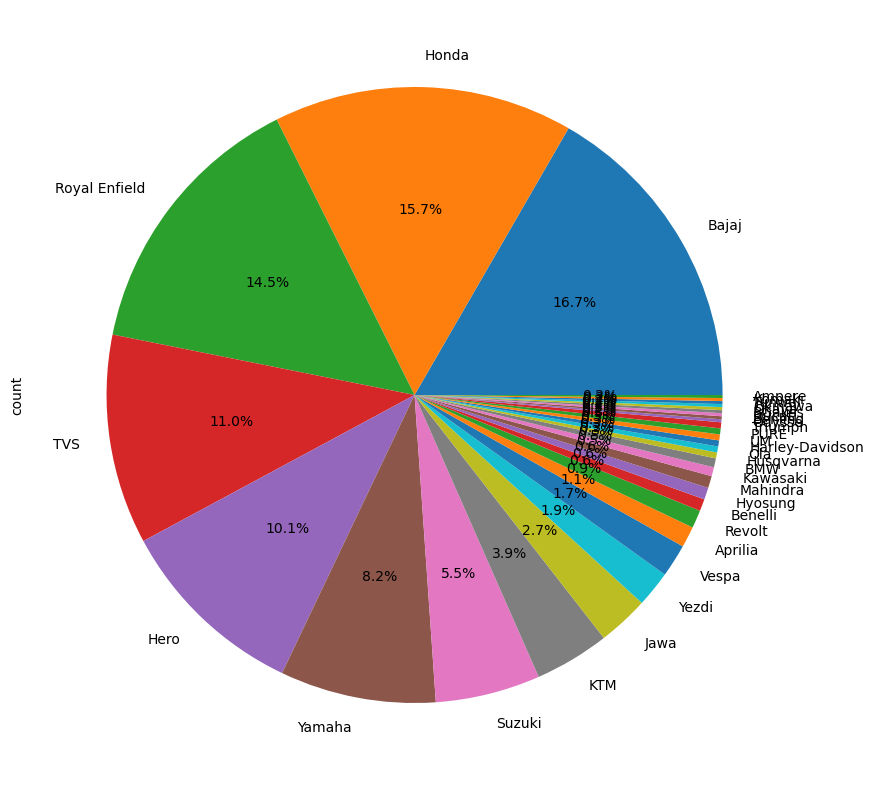

In [22]:
plt.figure(figsize=(18,10))
df['Brand'].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.show()

### Location

**intail_observations**

- Majority of bikes are from the cities Mumbai, Bangalore, Mumbai, Pune, Hyderabad and Kolkata
- These top 5 cities together account for a large share of the listings.
- A moderate number of listings are from cities like Kolkata (34), Noida (24), Chennai (19), Gurgaon (18), and Ghaziabad (18).
- Many other cities have only a handful of listings (1–5 bikes), indicating a long tail distribution.
- This suggests that the dataset is city-heavy towards metro/tier-1 locations, while tier-2 and tier-3 cities are underrepresented.

In [23]:
df['Location'].value_counts()

Location
Delhi        119
Bangalore     61
Mumbai        56
Pune          42
Hyderabad     40
            ... 
Srinagar       1
Jalandhar      1
Motihari       1
Budaun         1
Vidisha        1
Name: count, Length: 101, dtype: int64

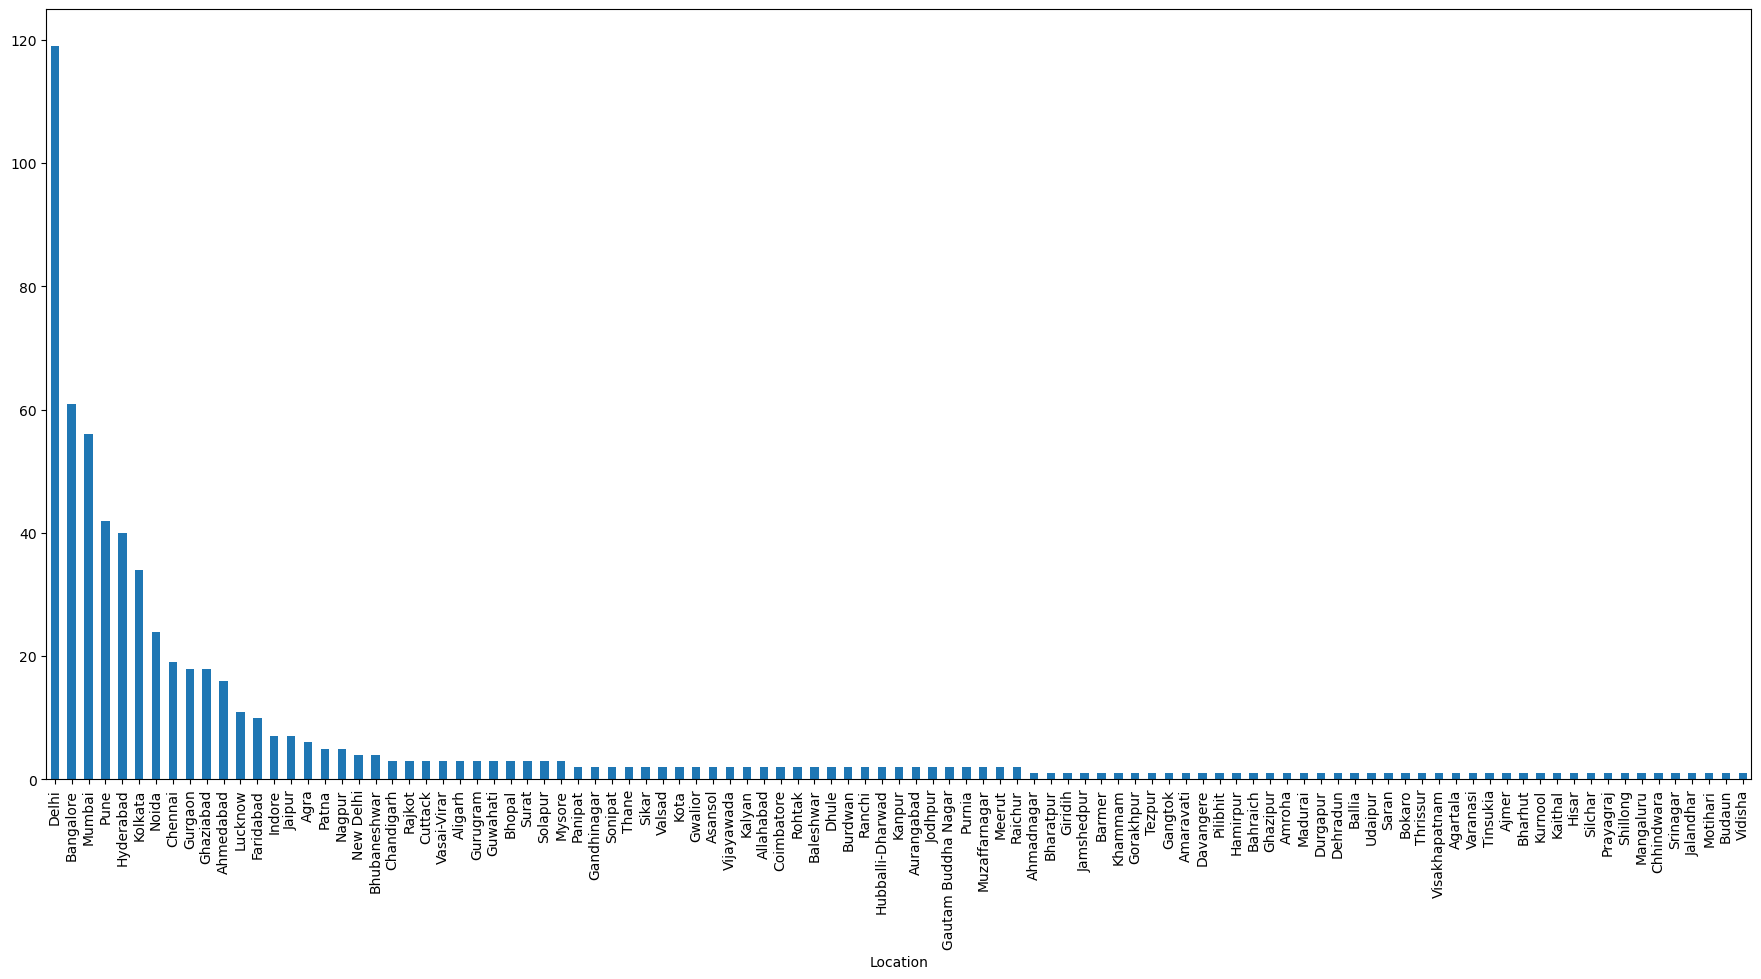

In [24]:
plt.figure(figsize=(22,10))
df['Location'].value_counts().plot(kind='bar')
plt.show()

### Type

**intail_observations**

- The dataset is heavily dominated by Petrol bikes (628 bikes, ~99%).
- Only 8 bikes (~1%) are EV (Electric Vehicles).
- This suggests that the market/data collected is still largely petrol-oriented, with EV adoption being minimal.

In [25]:
df['Type'].value_counts()

Type
Petrol    628
EV          8
Name: count, dtype: int64

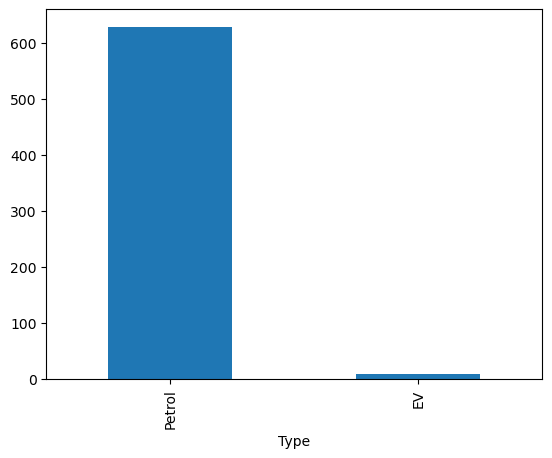

In [26]:
df['Type'].value_counts().plot(kind='bar')
plt.show()

## Bivariate Analysis

Analyzing the relationship between two columns (variables) at a time.

**Types**:

- Numerical - Numerical
- Numerical - Categorical
- Categorical - Categorical

### 1. Categorical - Categorical


#### Regestration_year - Type

#### Insights

- Petrol bikes dominate registrations across all years in the dataset.
- EV bikes started appearing only from 2021, with very small numbers compared to petrol.
- There is a noticeable increase in EV registrations between 2021–2023, though the counts remain low.
- Petrol bike registrations show fluctuations, with a peak around 2021 and then a decline.
- The dataset highlights the early adoption stage of EV bikes, while petrol bikes remain the mainstream choice.

In [27]:
df.head()

,Registration_year,Brand,Model,Type,Price,Km_Driven,Ownership,Location
0,2022,Hero,Passion Pro i3s Disc Alloy,Petrol,55000,30000,First,Bangalore
1,2017,Bajaj,Pulsar NS160 STD,Petrol,40000,27500,Third,Delhi
2,2017,Bajaj,Pulsar NS200 STD BS4,Petrol,55000,66850,First,Hyderabad
3,2017,Bajaj,Dominar 400 (2016-2018) ABS,Petrol,110000,35000,First,Jodhpur
4,2017,Royal Enfield,Classic 350 Redditch Series With Single-Channel,Petrol,145000,50000,First,Bangalore


In [29]:
temp_df = pd.crosstab(index=df['Type'],columns=df['Registration_year'])
temp_df

Registration_year,2007,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,KTM
Type,,,,,,,,,,,,,,,,,,
EV,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,3,0,0
Petrol,2,4,13,17,18,25,31,32,52,53,66,49,47,88,83,43,4,1


<Figure size 1200x900 with 0 Axes>

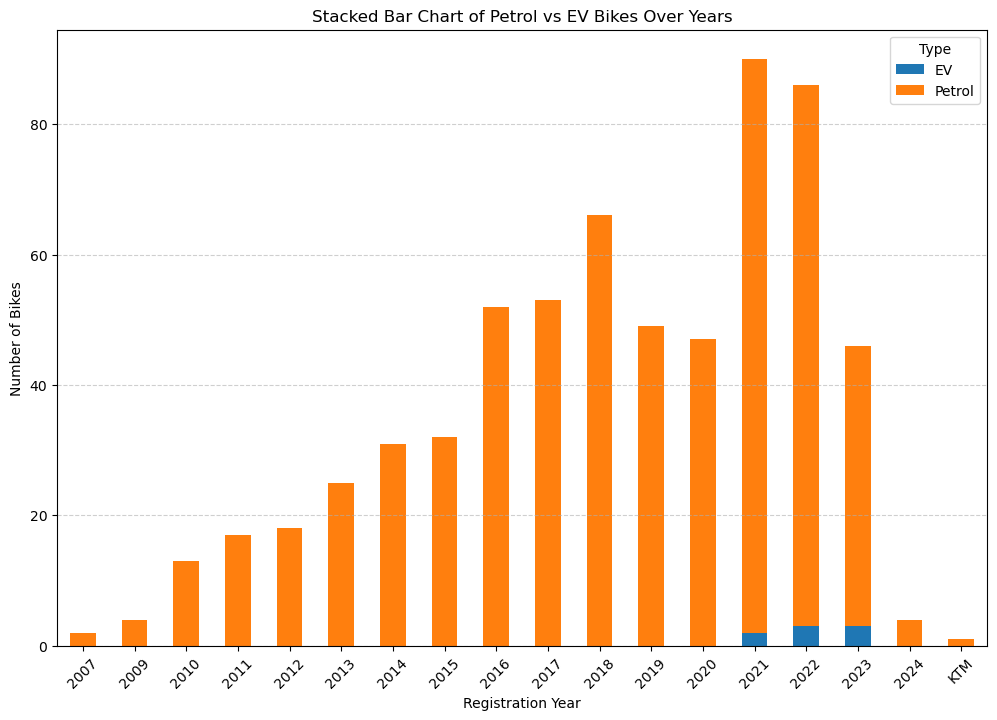

In [30]:
# Transpose so years are rows
df_plot = temp_df.T  

# Plot stacked bar chart
df_plot.plot(
    kind="bar", 
    stacked=True, 
    figsize=(12, 8)
)

plt.xlabel("Registration Year")
plt.ylabel("Number of Bikes")
plt.title("Stacked Bar Chart of Petrol vs EV Bikes Over Years")
plt.legend(title="Type")
plt.xticks(rotation=45)  # rotate years for readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


### Registration_year - Brand

#### Insights

**Brand-wise Yearly Registration Distribution (%)**
(How each brand’s registrations are spread across years)

- Established brands like Hero, Honda, Bajaj, and TVS show consistent presence across multiple years, indicating long-term dominance and market stability.
- New-age EV brands like Ola, Ather, and Revolt appear only in recent years (2020 onwards), reflecting the industry’s late shift toward electric mobility.
- Some premium/niche brands (e.g., Harley-Davidson, Triumph, BMW) have sporadic and low distribution, showing they target limited customer segments rather than mass adoption.

**Year-wise Brand Dominance (%)**
(Which brands dominated within each year)

- Honda, Hero, and Bajaj dominated the market share between 2010–2016, contributing the largest proportion of registrations in those years.
- From 2017 onwards, the market became more fragmented, with multiple brands sharing registrations instead of just a few leaders.
- In 2021–2023, EV brands (Ola, Ather, Revolt) rapidly gained share, showing a clear shift in dominance from petrol to electric segment.


In [ ]:
ct = pd.crosstab(index=df['Brand'],columns=df['Registration_year'],normalize='index')*100
bt = pd.crosstab(index=df['Brand'],columns=df['Registration_year'],normalize='columns')*100
bt = bt.round(2)
ct = ct.round(2)


In [ ]:
plt.figure(figsize=(19,10))
sns.heatmap(ct,annot=True,cmap='coolwarm',fmt='1.1f')
plt.title("Brand-wise Yearly Registration Distribution (%)", fontsize=16)
plt.xlabel("Registration Year")
plt.ylabel("Brand")
plt.show()

In [ ]:
plt.figure(figsize=(19,10))
sns.heatmap(bt,annot=True,cmap='coolwarm',fmt='1.1f')
plt.title("Year-wise Brand Dominance (%)", fontsize=16)
plt.xlabel("Registration Year")
plt.ylabel("Brand")
plt.show()

### Registration_year - Ownership

#### Insights


- First ownership dominates registrations across all years, especially after 2017, where more than 80–90% of bikes are from first owners.
- Second ownership shows presence mainly in older registrations (2010–2016) but becomes very small in recent years.
- Third & Above ownership is almost negligible, contributing very little across all years, showing that very few bikes circulate beyond the second resale.
- The overall count of bikes increases sharply after 2015, peaking around 2021–2022, showing higher market activity in recent years.
- First ownership segment grows significantly in recent years, dominating most of the stacked bars (2020–2023).
- Second ownership has a noticeable share in mid-years (2012–2016) but almost disappears after 2020, while third & above ownership remains very small across all years.

In [34]:
ct = pd.crosstab(index=df['Ownership'],columns=df['Registration_year'],normalize='columns')*100
ct = ct.round(2)

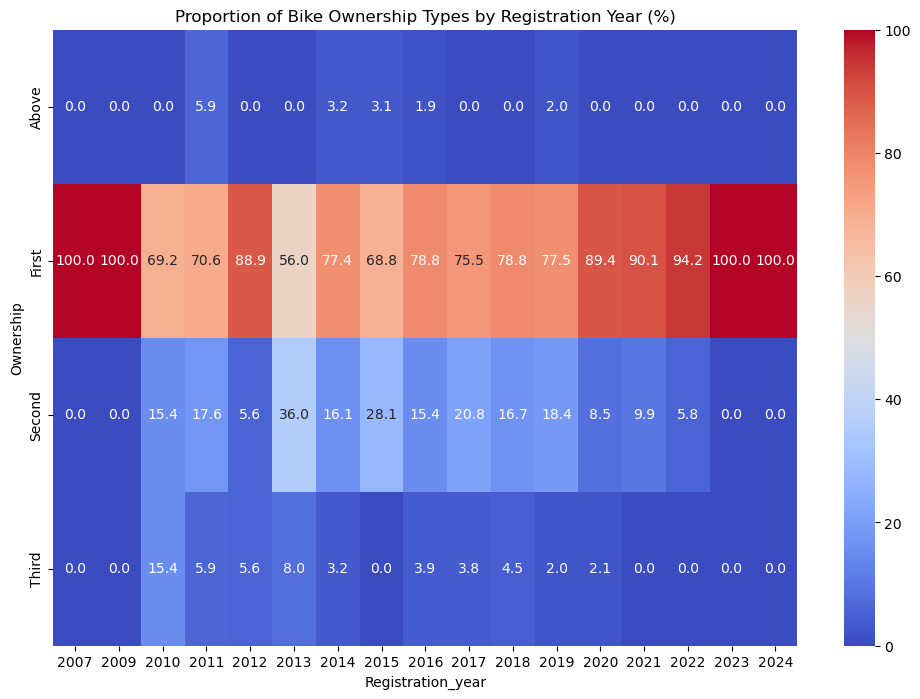

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(ct,annot=True,cmap='coolwarm',fmt='1.1f')
plt.title("Proportion of Bike Ownership Types by Registration Year (%)")
plt.show()

In [36]:
ct = pd.crosstab(index=df['Ownership'],columns=df['Registration_year'])
ct = ct.T


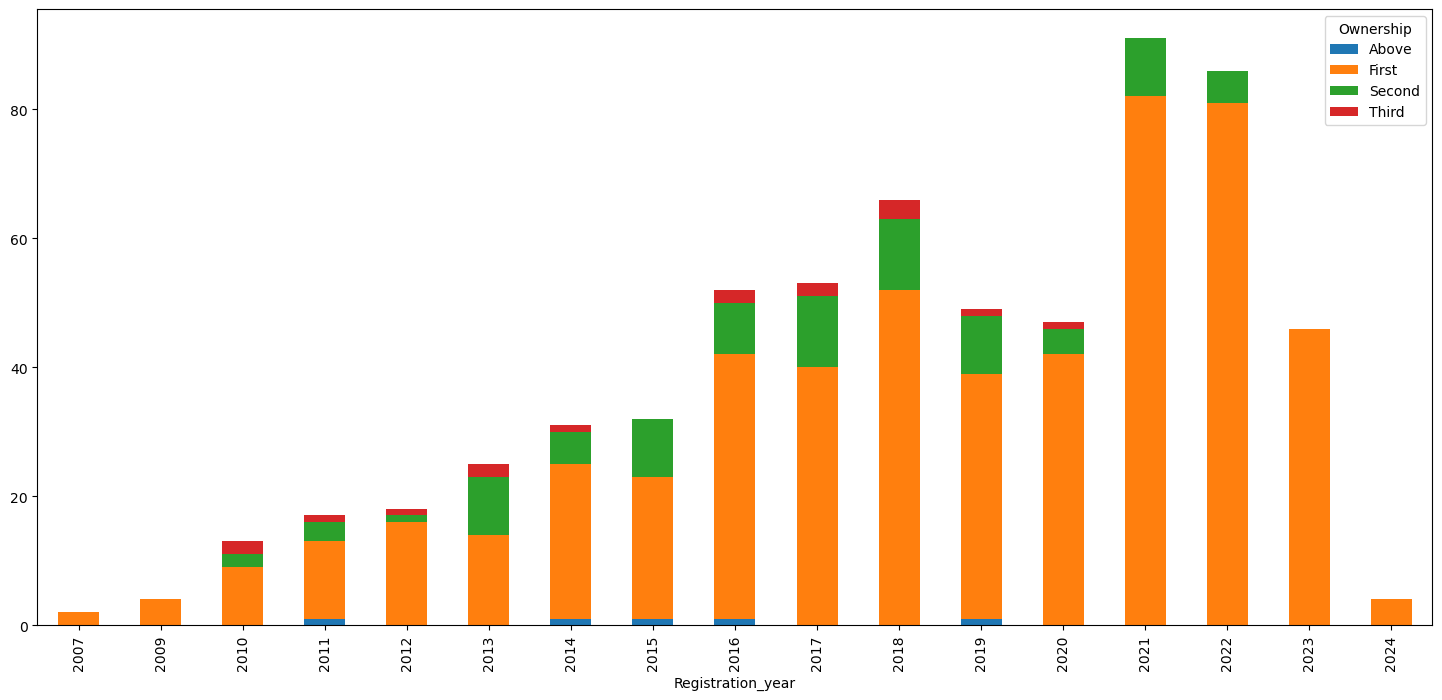

In [37]:
ct.plot(kind='bar',stacked=True,figsize=(18,8))
plt.show()

### Registration_year - Location

#### Insights

**City-level dominance :** Few cities like Delhi, Mumbai, Bangalore, Pune, and Hyderabad contribute disproportionately high shares across multiple registration years, showing these are the biggest hubs for resale of bikes.

**Regional skew :** Many smaller cities have negligible or 0% share across years, meaning the resale bike market is highly concentrated in metros and large urban centers rather than evenly spread.


In [33]:
ct = pd.crosstab(index=df['Location'],columns=df['Registration_year'],normalize='columns')*100
ct = ct.round(2)
ct

Registration_year,2007,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,KTM
Location,,,,,,,,,,,,,,,,,,
Agartala,0.0,0.0,0.00,0.00,0.00,4.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Agra,0.0,0.0,0.00,5.88,0.00,0.0,3.23,0.00,0.00,0.00,4.55,0.00,0.00,0.00,1.16,0.00,0.0,0.0
Ahmadnagar,0.0,0.0,0.00,0.00,0.00,4.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Ahmedabad,0.0,0.0,0.00,0.00,0.00,0.0,0.00,3.12,5.77,3.77,4.55,2.04,4.26,2.22,2.33,0.00,0.0,0.0
Ajmer,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.52,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Aligarh,0.0,25.0,0.00,0.00,0.00,4.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.16,0.00,0.0,0.0
Allahabad,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,2.04,0.00,0.00,1.16,0.00,0.0,0.0
Amaravati,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,1.92,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Amroha,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,2.04,0.00,0.00,0.00,0.00,0.0,0.0


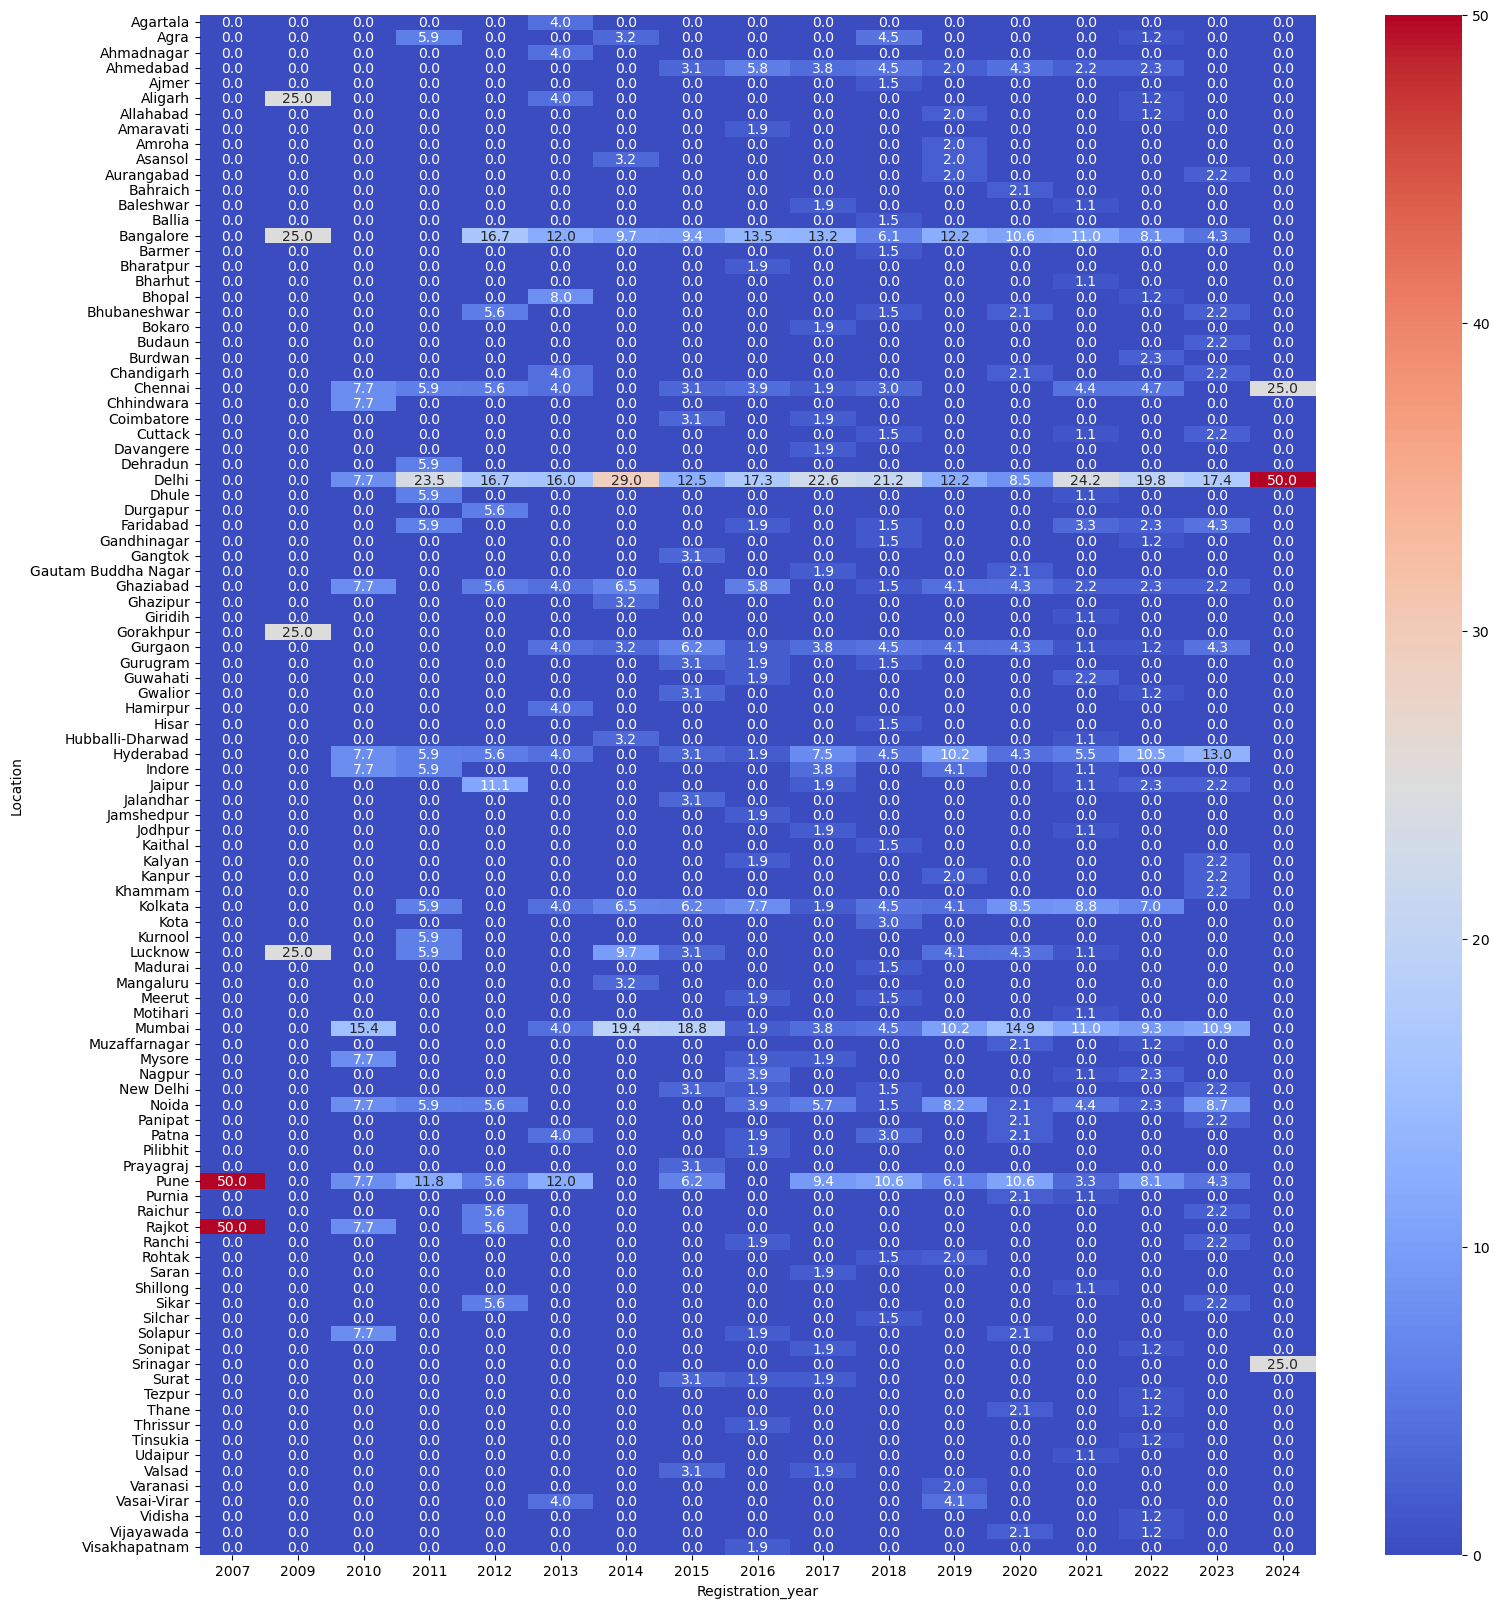

In [39]:
plt.figure(figsize=(18,20))
sns.heatmap(ct,cmap="coolwarm",fmt='1.1f',annot=True)
plt.show()

### Brand - Ownership

#### Insights 

**Mainstream brands dominate early ownership (First & Second) :** Honda, Bajaj, Hero, TVS, Royal Enfield, and Yamaha together account for the bulk of first and second-owner bikes, showing they drive the resale market.

**Luxury & niche brands show up mostly in later ownerships (Above/Third) :** Brands like KTM, Royal Enfield, Vespa, Yamaha have notable shares in third and above ownerships, suggesting enthusiasts keep reselling/upgrading within these segments, unlike premium brands (BMW, Ducati) that rarely move beyond first resale.

In [34]:
ct = pd.crosstab(index=df['Brand'],columns=df['Ownership'],normalize='columns')
ct

Ownership,Above,First,Second,Third
Brand,,,,
Ampere,0.0,0.001890,0.000000,0.0000
Aprilia,0.0,0.005671,0.046512,0.0000
BGauss,0.0,0.001890,0.000000,0.0000
BMW,0.0,0.005671,0.000000,0.0000
Bajaj,0.2,0.172023,0.139535,0.1250
Benelli,0.0,0.001890,0.011628,0.1250
Benling,0.0,0.001890,0.000000,0.0000
Ducati,0.0,0.000000,0.011628,0.0000
Harley-Davidson,0.0,0.001890,0.011628,0.0000


<Figure size 1200x900 with 0 Axes>

<Figure size 1000x2000 with 0 Axes>

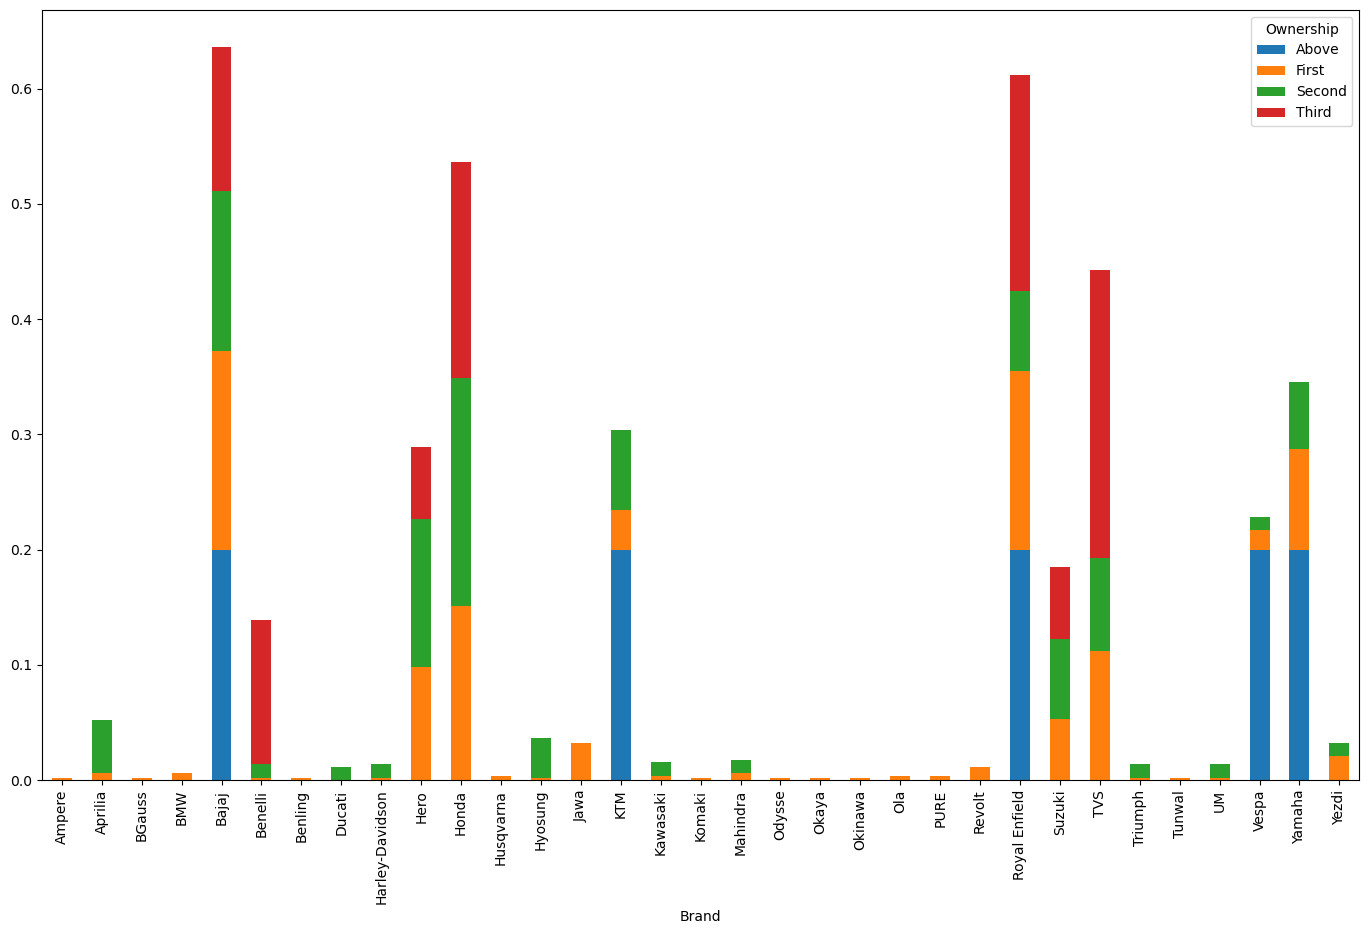

In [32]:
ct.plot(kind='bar',stacked=True,figsize=(17,10))
plt.show()

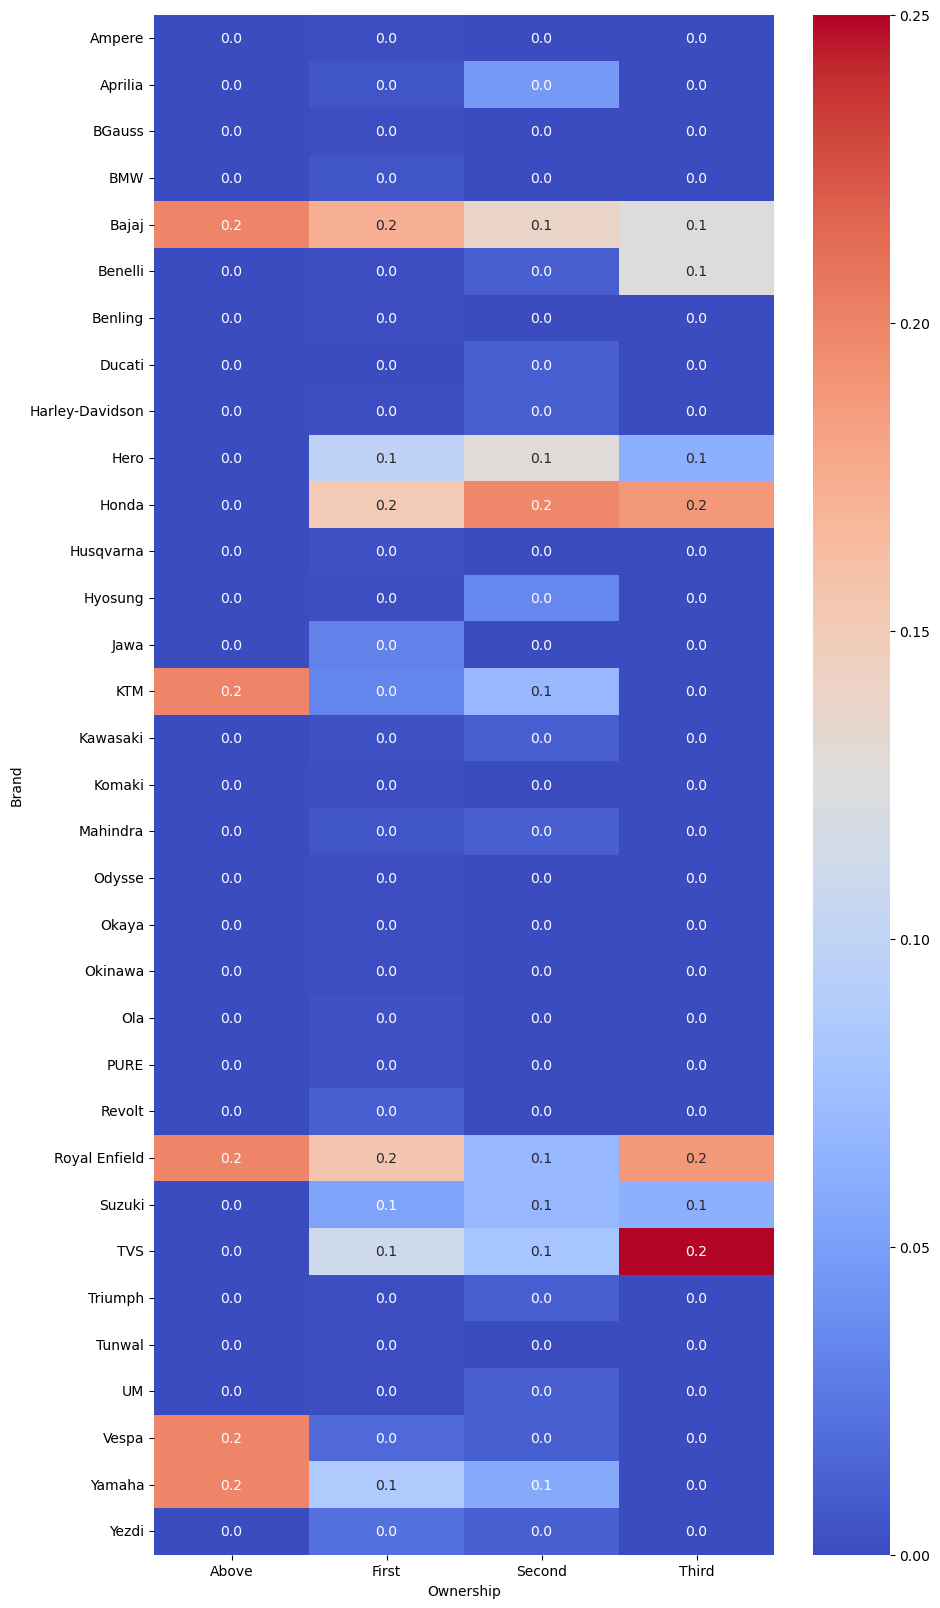

In [33]:
plt.figure(figsize=(10,20))
sns.heatmap(ct,cmap='coolwarm',annot=True,fmt='1.1f')
plt.show()

### Brand - Location

#### Insights

**Major urban hubs dominate listings :** Cities like Delhi, Bangalore, Mumbai, Hyderabad, Pune, Noida, Kolkata, Ghaziabad have the highest concentration of multiple brands — showing that metro and tier-1 cities drive the bulk of the used bike market.

**Brand diversity is highest in metros :** In places like Delhi, Mumbai, Bangalore, Hyderabad, and Pune, you see a wide variety of brands (from Honda, Bajaj, Royal Enfield to premium brands like BMW, Aprilia, Triumph). In contrast, smaller towns usually show only one or two mainstream brands (Hero, Bajaj, Honda).

In [36]:
ct = pd.crosstab(index=df['Location'],columns=df['Brand'])
ct

Brand,Ampere,Aprilia,BGauss,BMW,Bajaj,Benelli,Benling,Ducati,Harley-Davidson,Hero,Honda,Husqvarna,Hyosung,Jawa,KTM,Kawasaki,Komaki,Mahindra,Odysse,Okaya,Okinawa,Ola,PURE,Revolt,Royal Enfield,Suzuki,TVS,Triumph,Tunwal,UM,Vespa,Yamaha,Yezdi
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Agartala,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Agra,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0
Ahmadnagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Ahmedabad,0,0,0,0,3,0,0,0,0,3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,2,1,2,0,0,0,1,1,0
Ajmer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Aligarh,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Allahabad,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Amaravati,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Amroha,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


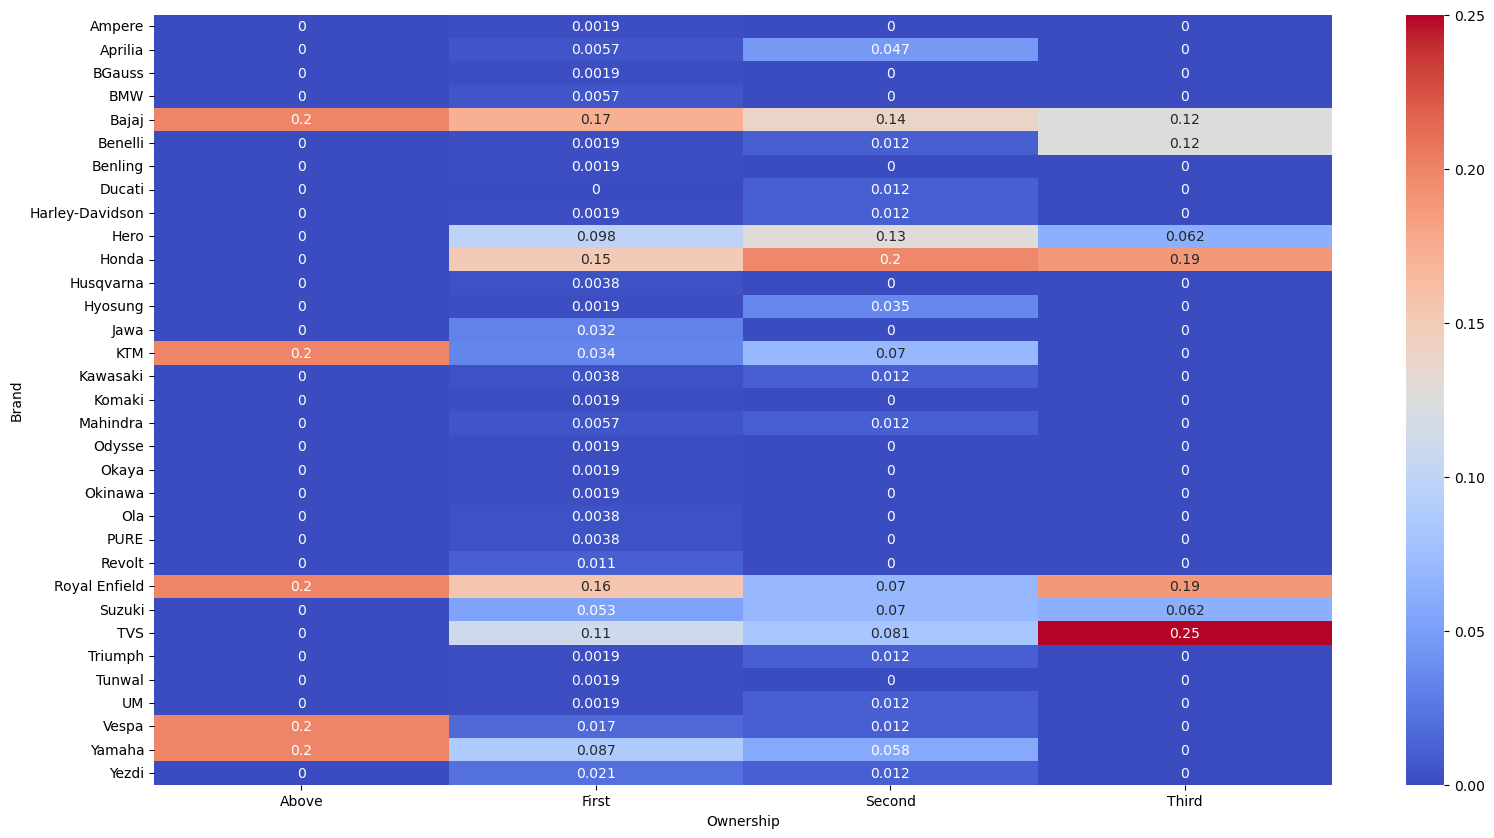

In [35]:
plt.figure(figsize=(19,10))
sns.heatmap(ct,cmap='coolwarm',annot=True)
plt.show()

### Ownership - Location

#### Insights

**Metro cities dominate first-ownership bikes :** Delhi (100), Bangalore (48), Mumbai (46), Hyderabad (35), Pune (34), Kolkata (29), and Noida (22) have the highest concentration of first-owner bikes, showing that major metros are the biggest contributors to the used bike market.

**Second-ownership bikes are scattered but much smaller in number :** Only a few cities (Bangalore – 13, Delhi – 16, Mumbai – 7, Pune – 7, Chennai – 4) show noticeable second-owner bike presence, while in most other locations, bikes are overwhelmingly first-owner.

In [39]:
ct = pd.crosstab(index=df['Location'],columns=df['Ownership'])
ct

Ownership,Above,First,Second,Third
Location,,,,
Agartala,0,1,0,0
Agra,0,6,0,0
Ahmadnagar,0,0,1,0
Ahmedabad,0,16,0,0
Ajmer,0,0,1,0
Aligarh,0,2,1,0
Allahabad,0,2,0,0
Amaravati,1,0,0,0
Amroha,0,1,0,0


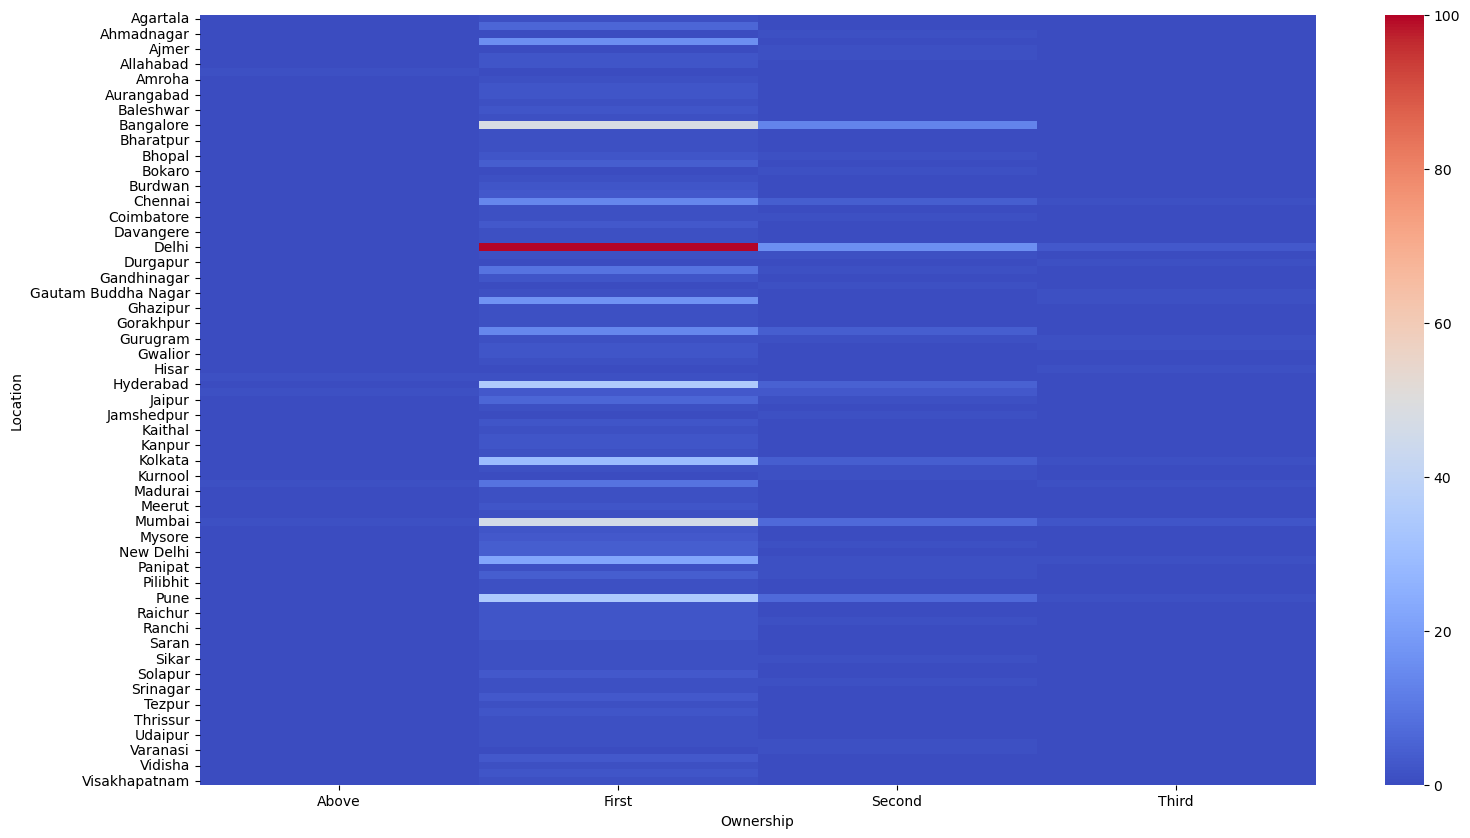

In [41]:
plt.figure(figsize=(18,10))
sns.heatmap(ct,cmap='coolwarm')
plt.show()

## Numerical - Numerical

### Insights

**Scatter Plot (Price vs Km_Driven):**

- Clear negative relationship: bikes with higher kilometers driven are generally priced lower.
- A few outliers exist (very high-priced bikes even at high kilometers, or low-priced bikes with low kilometers). These could be due to premium models, superbikes, or modified/custom bikes that don’t follow the usual depreciation trend.

**Correlation (Pearson = -0.41, Spearman = -0.57):**

- Pearson (-0.41): Moderate linear negative correlation → As Km_Driven increases, Price tends to drop.
- Spearman (-0.57): Stronger monotonic negative correlation → Ranking-wise, bikes with higher kilometers are almost always cheaper, even if not perfectly linear.

### Price - Km_Driven

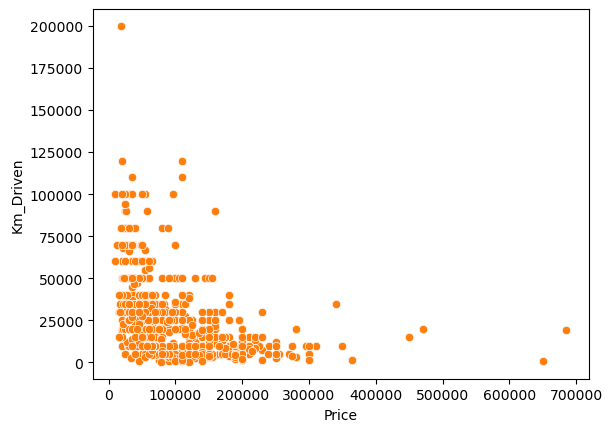

In [60]:
sns.scatterplot(data=df,x='Price',y='Km_Driven')
plt.show()

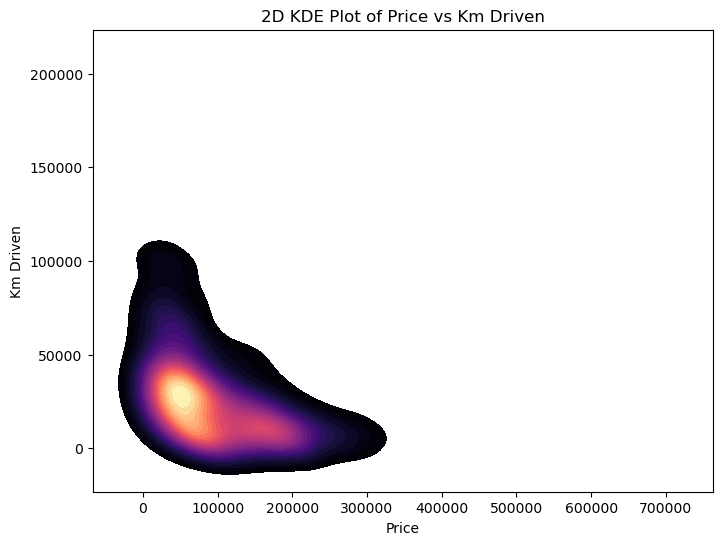

In [64]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    x=df['Price'],
    y=df['Km_Driven'],
    fill=True,
    cmap='magma',# Fills the contours
    thresh=0.05, # Threshold for contour visibility
    levels=30    # Smoothness
)

plt.title("2D KDE Plot of Price vs Km Driven")
plt.xlabel("Price")
plt.ylabel("Km Driven")
plt.show()


In [77]:
corr = df[['Price','Km_Driven']].corr()
corr_s = df[['Price','Km_Driven']].corr(method='spearman')

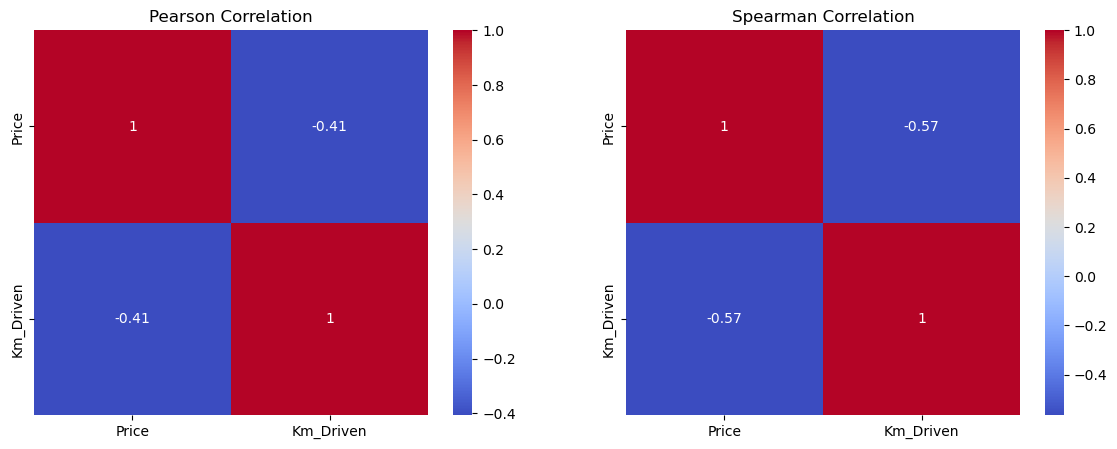

In [83]:
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(14,5))
sns.heatmap(corr,annot=True,cmap='coolwarm',ax=ax[0])
sns.heatmap(corr_s,annot=True,cmap='coolwarm',ax=ax[1])
ax[0].set_title("Pearson Correlation")
ax[1].set_title("Spearman Correlation")
plt.show()

## Numerical - Categorical

### Registration_year - Price

### Insights


**Depreciation Effect:**
- Older bikes (2007–2012) have much lower resale prices (₹16k–₹28k), while newer bikes (2020–2024) retain significantly higher values (₹1.1L–₹1.48L).

**High Variability in Mid Years:**
- Bikes from 2013–2016 show wide price variation due to the presence of both budget and premium/sports models (e.g., 2015 max ₹6.85L vs. median ~₹46k).

**Strong Demand for Recent Bikes:**
- Recent models (2021–2023) maintain consistently high resale prices, with 2022 peaking due to premium superbikes reaching up to ₹6.5L.

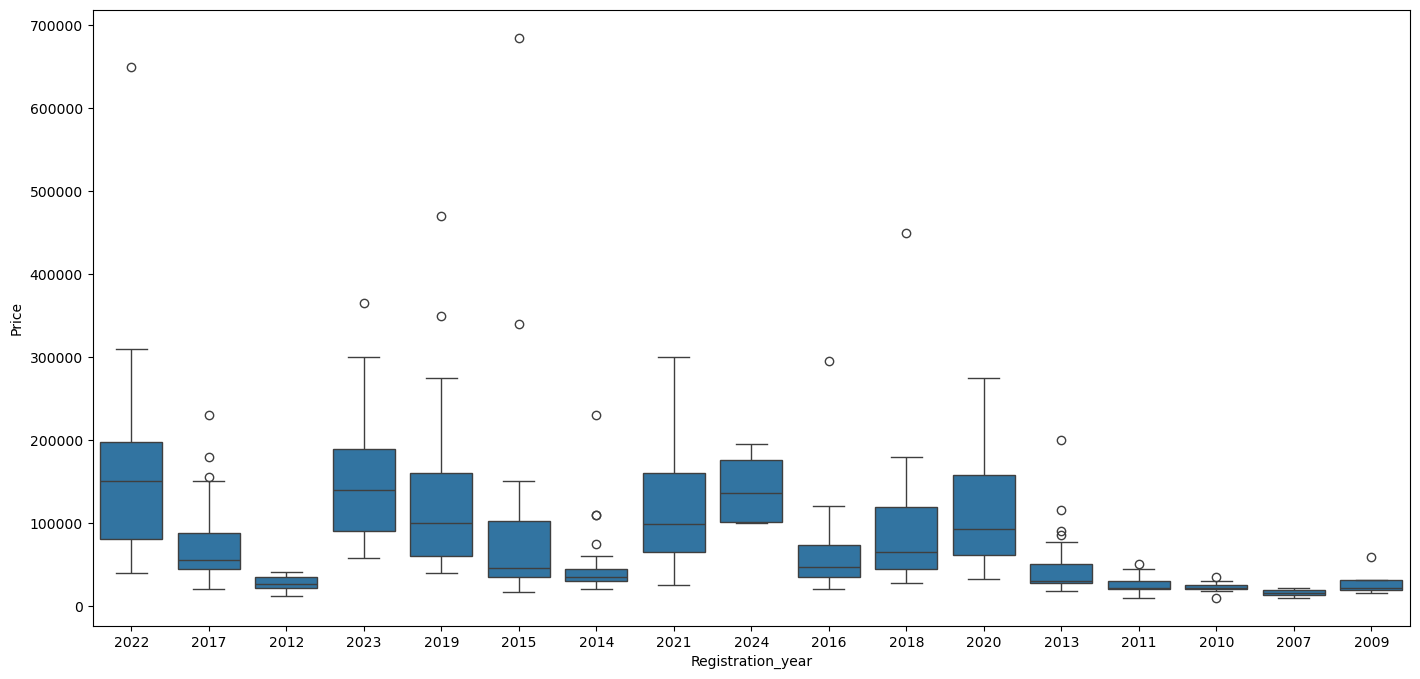

In [90]:
plt.figure(figsize=(17,8))
sns.boxplot(data=df, x="Registration_year", y="Price")
plt.show()

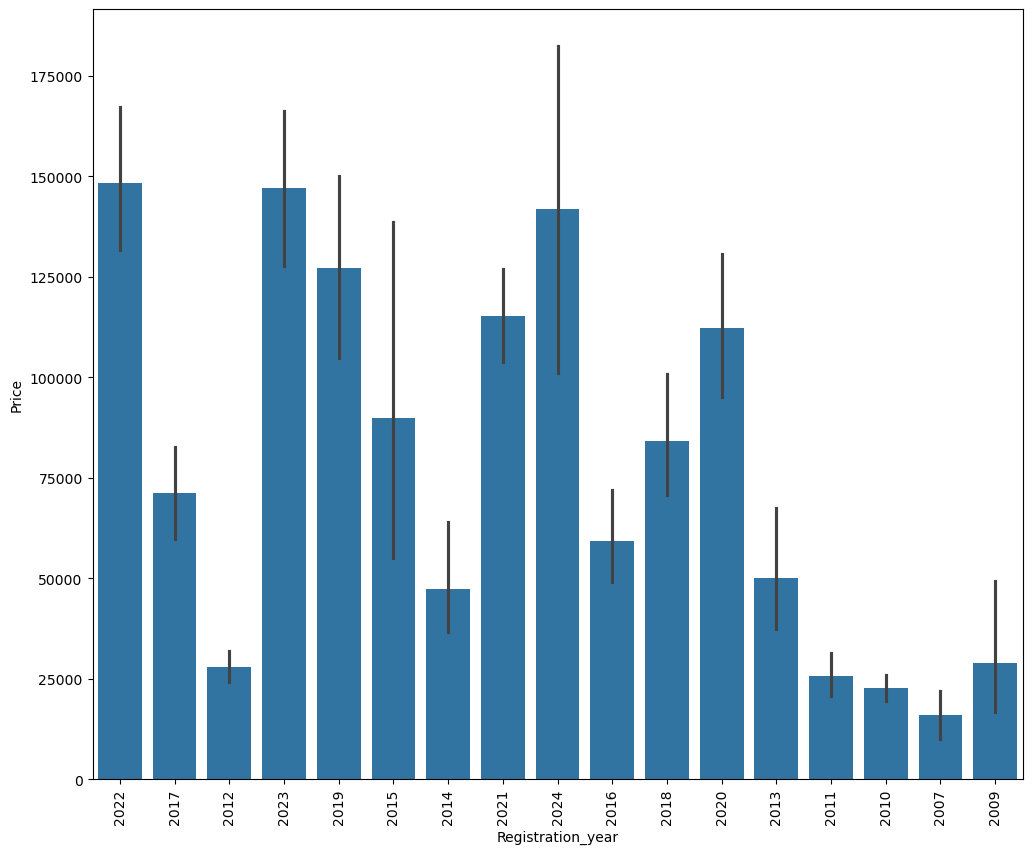

In [96]:
plt.figure(figsize=(12,10))
sns.barplot(data=df, x="Registration_year", y="Price", estimator=np.mean)
plt.xticks(rotation=90)
plt.show()

In [101]:
df.groupby('Registration_year')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Registration_year,,,,,,,,
2007,2.0,16000.000000,8485.281374,10000.0,13000.0,16000.0,19000.0,22000.0
2009,4.0,29000.000000,20215.505600,15000.0,18750.0,21000.0,31250.0,59000.0
2010,13.0,22692.307692,6303.234823,10000.0,20000.0,22000.0,25000.0,35000.0
2011,17.0,25705.882353,10693.249657,10000.0,20000.0,22000.0,30000.0,50000.0
2012,18.0,27944.444444,8720.983635,12000.0,21250.0,26500.0,35000.0,41000.0
2013,25.0,49983.960000,39845.440124,17599.0,28000.0,30000.0,50000.0,200000.0
2014,31.0,47419.354839,40509.895247,20000.0,30000.0,35000.0,45000.0,230000.0
2015,32.0,89890.625000,125236.146898,17000.0,35000.0,46000.0,102500.0,685000.0
2016,52.0,59336.500000,42291.768523,20000.0,35000.0,46500.0,73750.0,295000.0


### Brand - Price

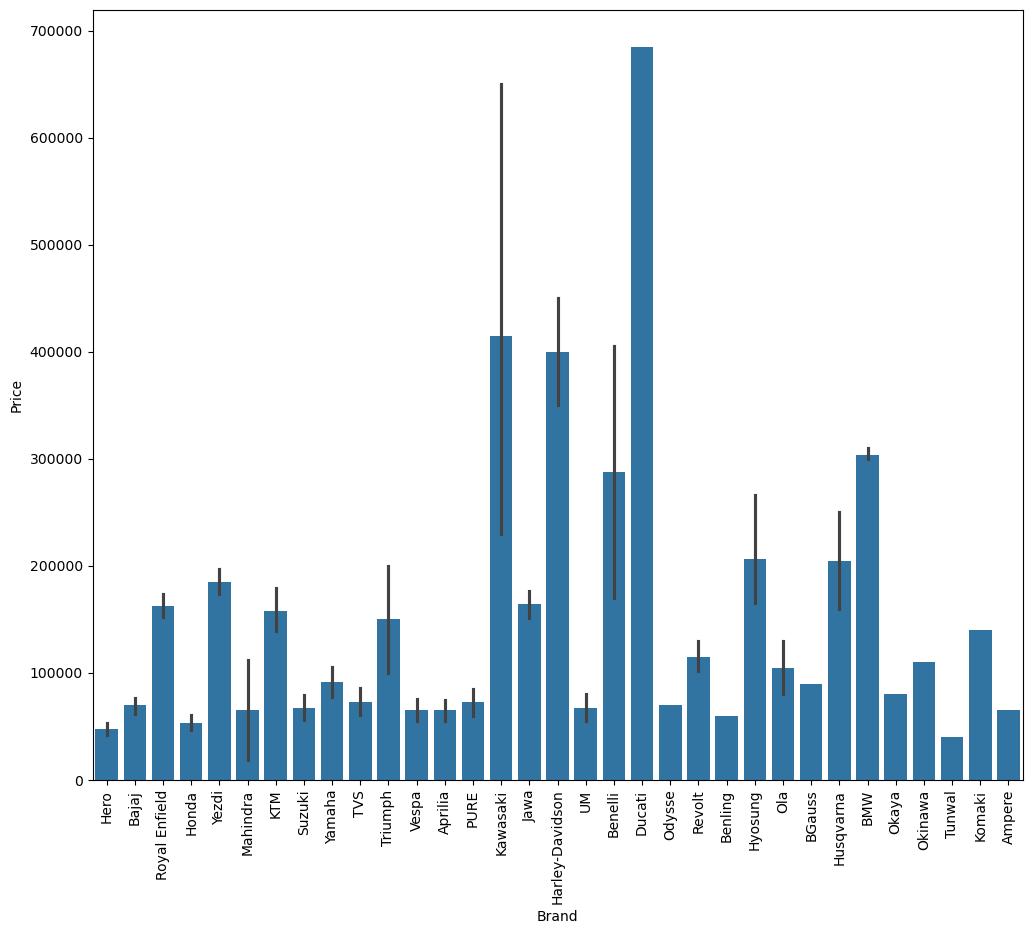

In [105]:
plt.figure(figsize=(12,10))
sns.barplot(data=df, x="Brand", y="Price", estimator=np.mean)
plt.xticks(rotation=90)
plt.show()

In [106]:
df.groupby("Brand")["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Brand,,,,,,,,
Ampere,1.0,65000.000000,NaN,65000.0,65000.0,65000.0,65000.0,65000.0
Aprilia,7.0,65000.000000,14719.601444,40000.0,57500.0,65000.0,77500.0,80000.0
BGauss,1.0,90000.000000,NaN,90000.0,90000.0,90000.0,90000.0,90000.0
BMW,3.0,303333.333333,5773.502692,300000.0,300000.0,300000.0,305000.0,310000.0
Bajaj,106.0,69668.386792,39764.718840,10000.0,40000.0,60000.0,88875.0,175000.0
Benelli,4.0,287500.000000,145916.642871,160000.0,175000.0,260000.0,372500.0,470000.0
Benling,1.0,60000.000000,NaN,60000.0,60000.0,60000.0,60000.0,60000.0
Ducati,1.0,685000.000000,NaN,685000.0,685000.0,685000.0,685000.0,685000.0
Harley-Davidson,2.0,400000.000000,70710.678119,350000.0,375000.0,400000.0,425000.0,450000.0


### Price - Ownership

**First Ownership Dominates**
- The majority of bikes are first-hand (529 records), and they command the highest average resale price (~₹97.6K), reflecting stronger buyer preference for single-owner bikes.

**Higher Variability in Multi-Owner Bikes**
- Second and third-owner bikes show much higher price variability (std ~₹97K–₹118K) compared to first-owner bikes, indicating inconsistent valuation depending on condition and model.

**Premium Retention Possible Even After Multiple Owners**
- Although prices generally decline with more owners, second and third-owner bikes still reach very high maximum values (₹6.85L and ₹4.7L), showing that premium/sports bikes retain strong resale value regardless of ownership count.

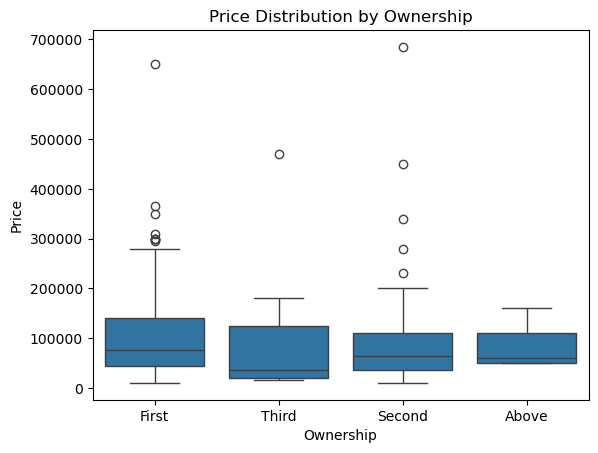

In [15]:
sns.boxplot(x=df['Ownership'],y=df['Price'])
plt.title("Price Distribution by Ownership")
plt.show()

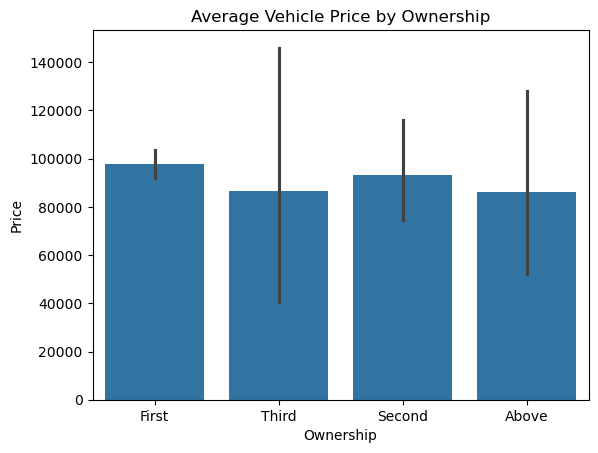

In [14]:
sns.barplot(x=df['Ownership'],y=df['Price'],estimator=np.mean)
plt.title("Average Vehicle Price by Ownership")
plt.show()

In [24]:
df.groupby('Ownership')["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Ownership,,,,,,,,
Above,5.0,85999.800000,48270.259997,49999.0,50000.0,60000.0,110000.0,160000.0
First,529.0,97619.892250,70063.460272,10000.0,45000.0,77000.0,140000.0,650000.0
Second,86.0,93152.302326,97823.527613,10000.0,36250.0,65000.0,110000.0,685000.0
Third,16.0,86599.937500,117878.168180,15000.0,19500.0,35000.0,125000.0,470000.0


### Price - Location

### Insights

- Wide price variability in metro cities (like Bangalore, Hyderabad, Mumbai, and Delhi), showing that these markets have both budget and premium bikes.

- Some locations (e.g., Ranchi, Surat, Vishakhapatnam) have significantly higher median prices, suggesting stronger demand for mid-to-high-end bikes there.

- Many tier-2/3 cities show tighter price ranges, indicating more uniform pricing with fewer premium outliers compared to metros.

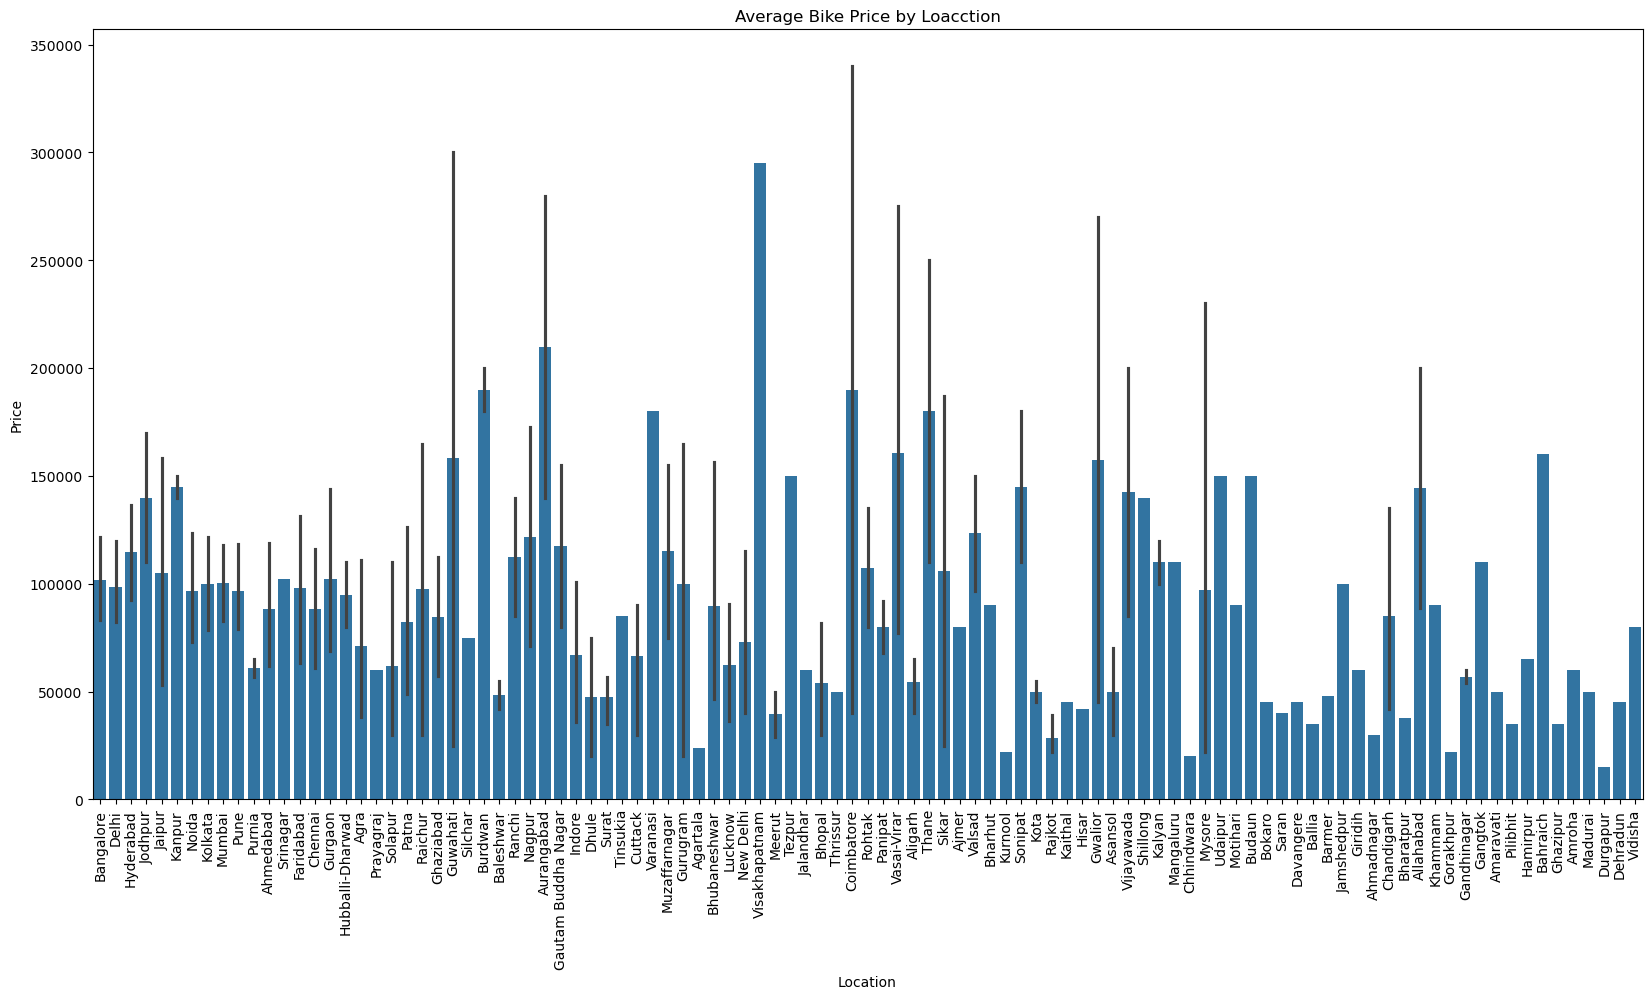

In [33]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Location'],y=df['Price'],estimator=np.mean)
plt.xticks(rotation = 90)
plt.title("Average Bike Price by Loacction")
plt.show()

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

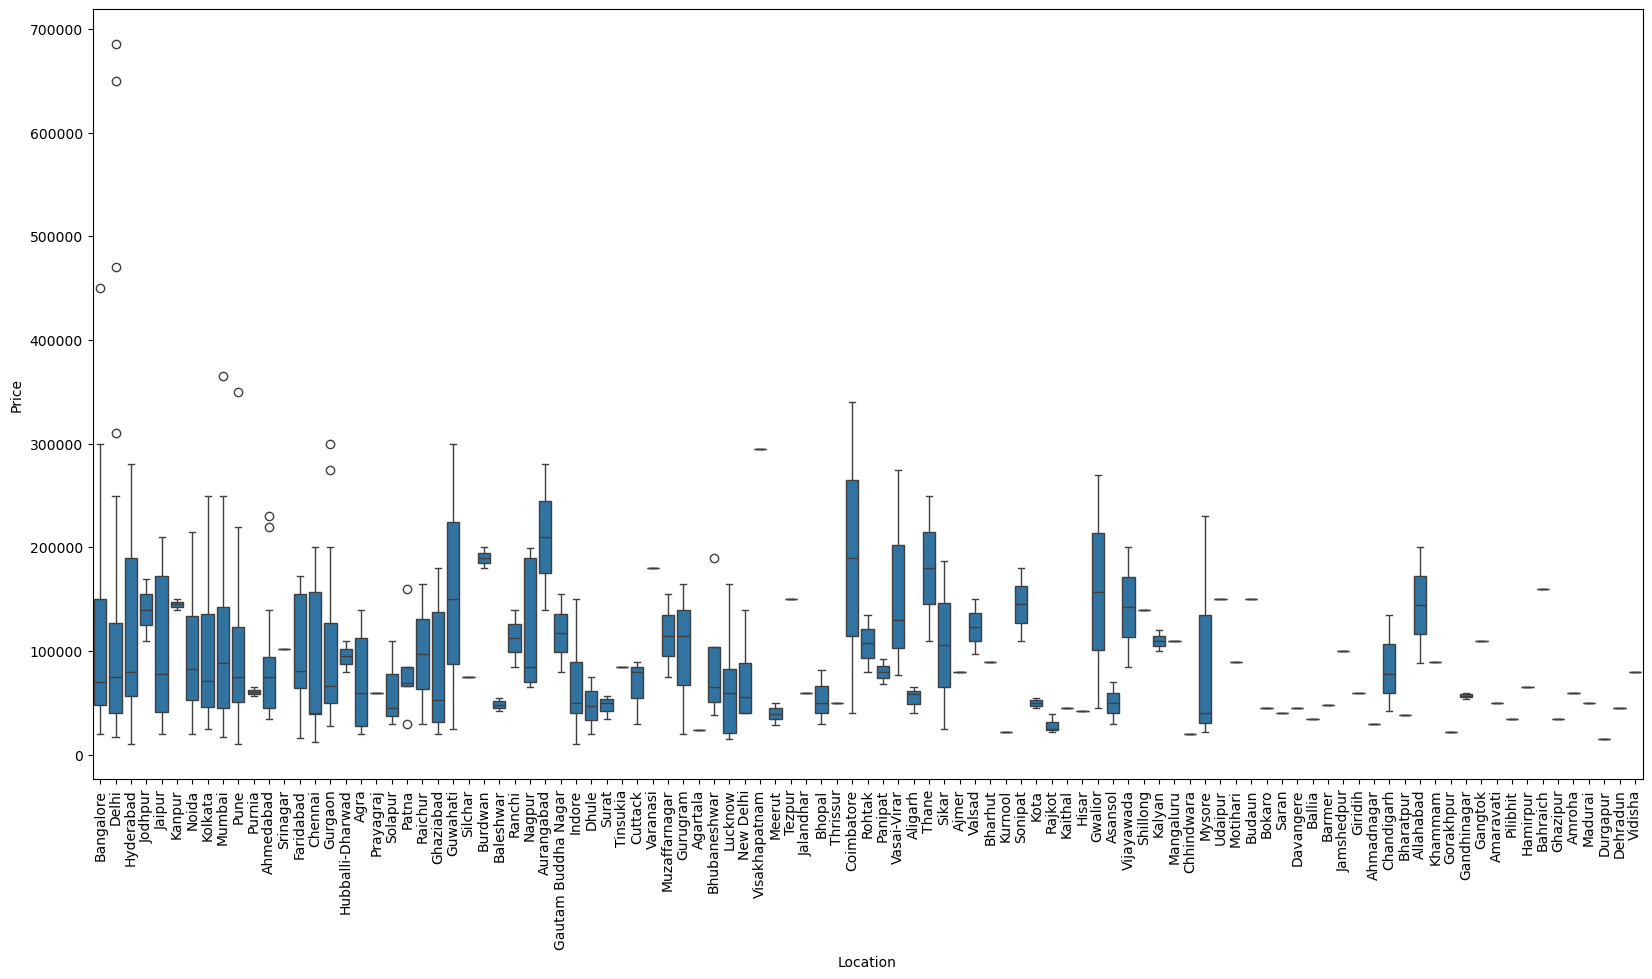

In [36]:
plt.figure(figsize=(20,10))
sns.boxplot(y=df["Price"],x=df["Location"])
plt.xticks(rotation = 90)
plt.show()

### Km_Driven - Registration_year

### Insights

- Older bikes (2007–2012) show much higher average kilometers driven (40k–62k km), reflecting long usage before resale.

- Recent models (2018–2024) have much lower average km driven (below 20k), as they are newer and likely resold earlier.

- High variability in mid-years (2011–2016) suggests mixed usage patterns — some bikes driven extensively (100k–200k km), while others were lightly used before resale.

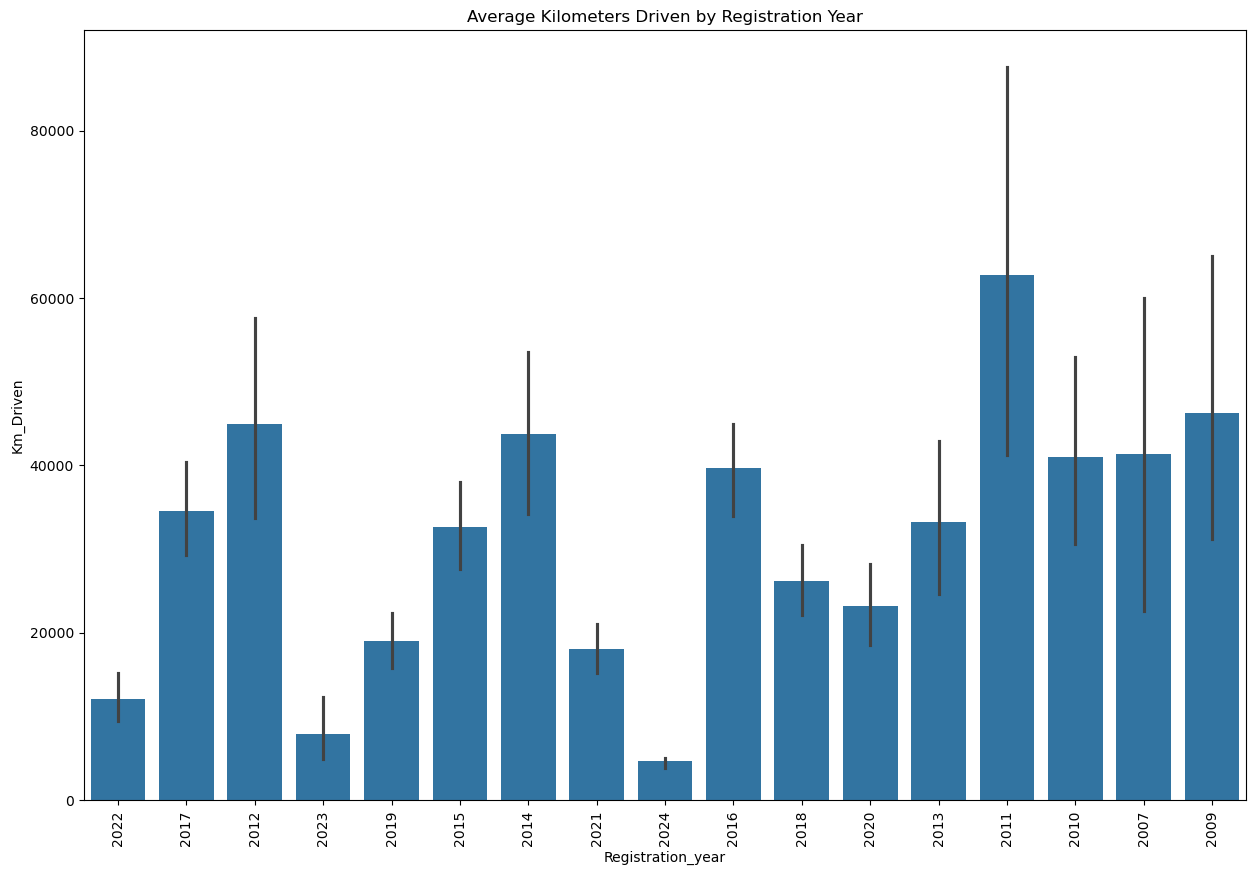

In [82]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Registration_year'],y=df['Km_Driven'],estimator=np.mean)
plt.xticks(rotation = 90)
plt.title("Average Kilometers Driven by Registration Year")
plt.show()

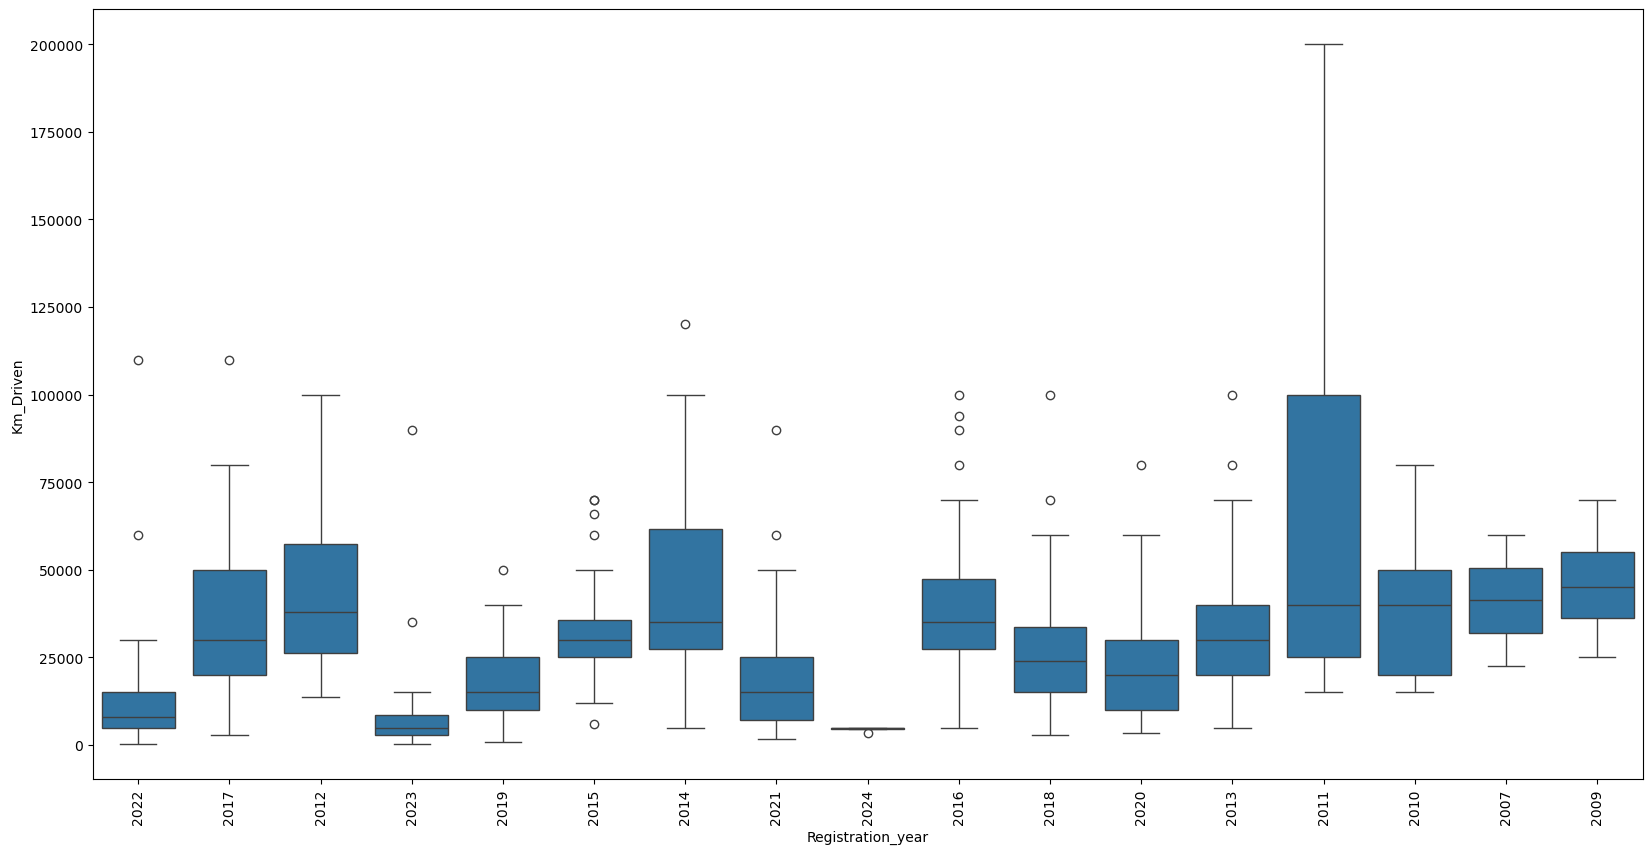

In [83]:
plt.figure(figsize=(20,10))
sns.boxplot(y=df["Km_Driven"],x=df["Registration_year"])
plt.xticks(rotation = 90)
plt.show()

In [84]:
df.groupby("Registration_year")['Km_Driven'].describe()

,count,mean,std,min,25%,50%,75%,max
Registration_year,,,,,,,,
2007,2.0,41300.000000,26445.793616,22600.0,31950.0,41300.0,50650.0,60000.0
2009,4.0,46250.000000,18874.586088,25000.0,36250.0,45000.0,55000.0,70000.0
2010,13.0,41041.923077,22370.946890,15000.0,20000.0,40000.0,50000.0,80000.0
2011,17.0,62794.117647,50343.525783,15000.0,25000.0,40000.0,100000.0,200000.0
2012,18.0,44948.111111,27278.909373,13725.0,26125.0,38000.0,57500.0,100000.0
2013,25.0,33258.400000,22929.704177,5000.0,20000.0,30000.0,40000.0,100000.0
2014,31.0,43725.806452,26662.032527,5000.0,27500.0,35000.0,61750.0,120000.0
2015,32.0,32659.750000,15672.772633,6000.0,25000.0,30000.0,35650.0,70000.0
2016,52.0,39647.576923,20988.181605,5000.0,27375.0,35000.0,47375.0,100000.0


### Brand - Km_Driven

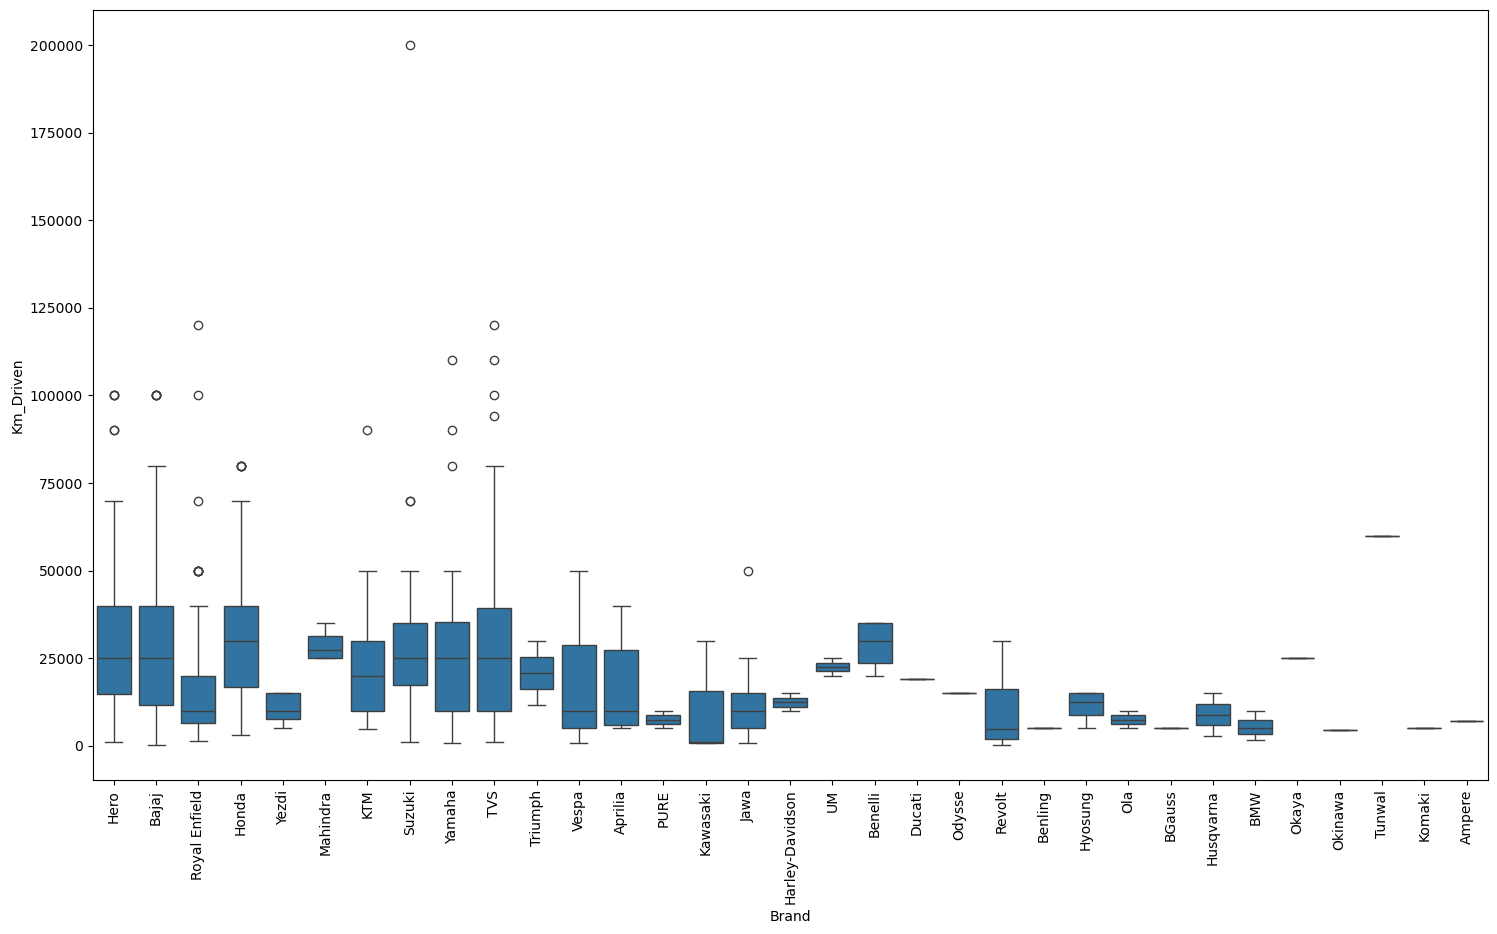

In [9]:
plt.figure(figsize=(18,10))
sns.boxplot(y=df["Km_Driven"],x=df["Brand"])
plt.xticks(rotation = 90)
plt.show()

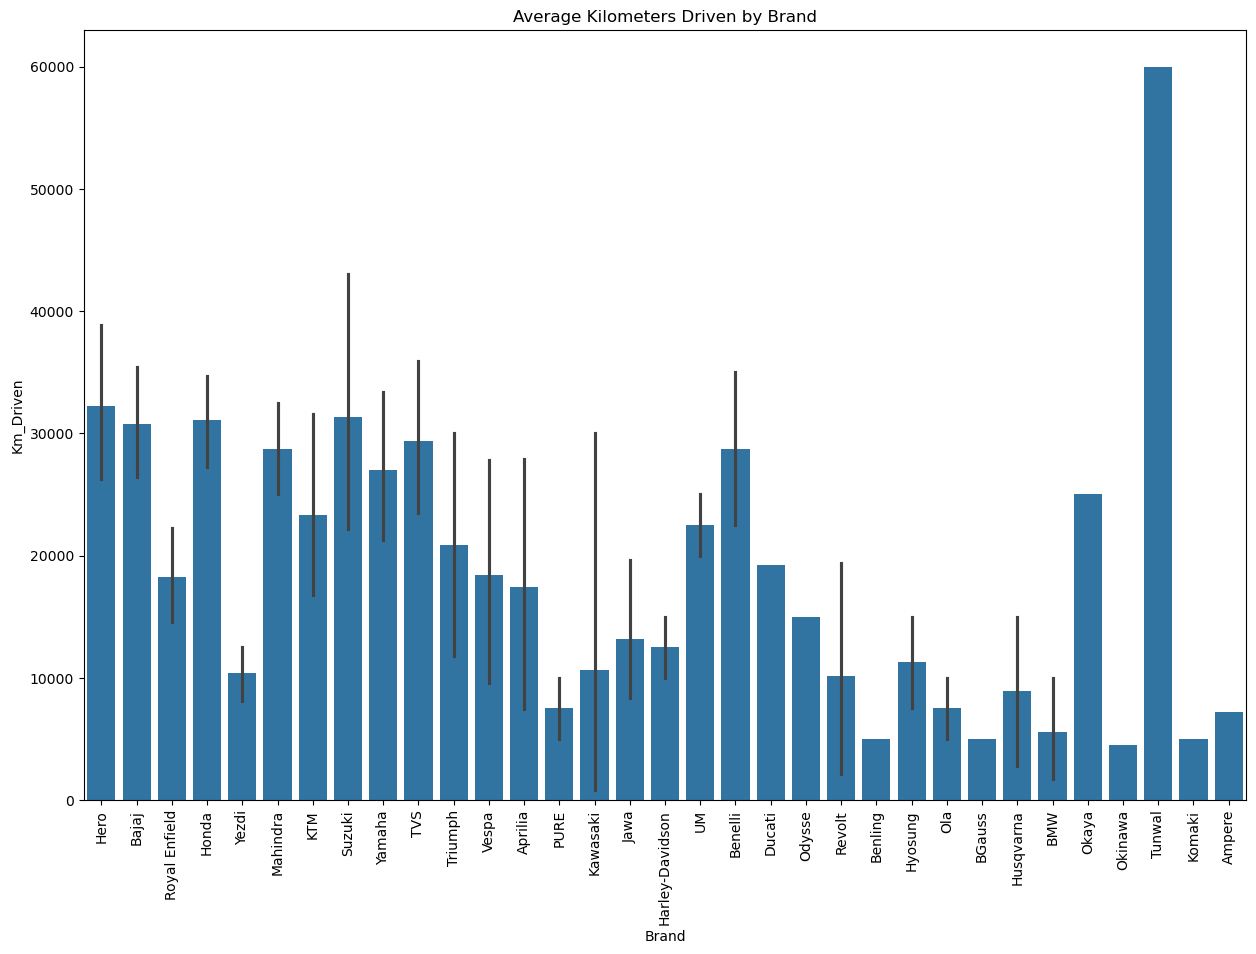

In [11]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Brand'],y=df['Km_Driven'],estimator=np.mean)
plt.xticks(rotation = 90)
plt.title("Average Kilometers Driven by Brand")
plt.show()

In [14]:
df.groupby('Brand')['Km_Driven'].describe()

,count,mean,std,min,25%,50%,75%,max
Brand,,,,,,,,
Ampere,1.0,7200.000000,NaN,7200.0,7200.00,7200.0,7200.0,7200.0
Aprilia,7.0,17428.571429,14128.660503,5000.0,6000.00,10000.0,27500.0,40000.0
BGauss,1.0,5000.000000,NaN,5000.0,5000.00,5000.0,5000.0,5000.0
BMW,3.0,5566.666667,4178.915330,1700.0,3350.00,5000.0,7500.0,10000.0
Bajaj,106.0,30788.811321,23766.588079,350.0,11575.00,25000.0,40000.0,100000.0
Benelli,4.0,28750.000000,7500.000000,20000.0,23750.00,30000.0,35000.0,35000.0
Benling,1.0,5000.000000,NaN,5000.0,5000.00,5000.0,5000.0,5000.0
Ducati,1.0,19200.000000,NaN,19200.0,19200.00,19200.0,19200.0,19200.0
Harley-Davidson,2.0,12500.000000,3535.533906,10000.0,11250.00,12500.0,13750.0,15000.0


### Ownership - Km_Driven

### Insights

- Mass-market brands (Bajaj, Hero, Honda, TVS, Yamaha, Suzuki) show higher average km driven (27k–32k), indicating longer daily usage and stronger resale market.

- Premium / performance brands (Royal Enfield, KTM, Jawa, Benelli, Triumph, Ducati, Harley, etc.) generally have lower average km driven (10k–23k) — buyers may use them less frequently (weekend rides, leisure).

- Electric brands (Ola, Okinawa, Ampere, Benling, PURE, etc.) show very low km driven (5k–7k), reflecting their recent entry into the market and limited long-distance usage.

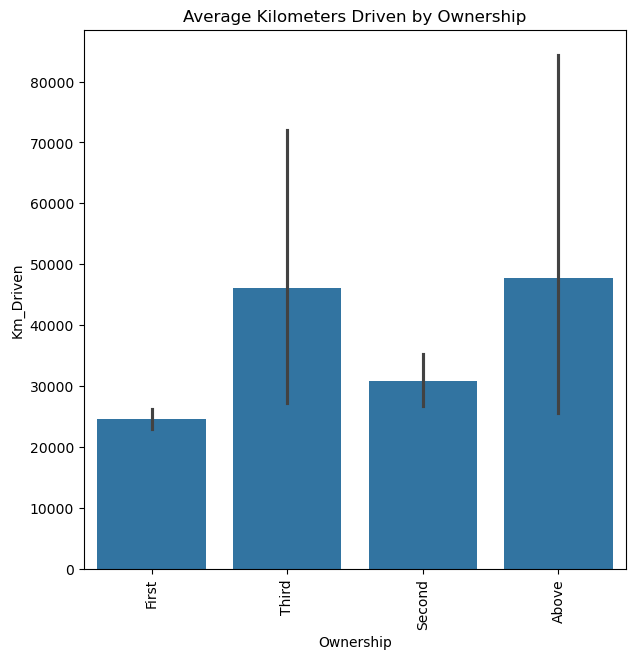

In [17]:
plt.figure(figsize=(7,7))
sns.barplot(x=df['Ownership'],y=df['Km_Driven'],estimator=np.mean)
plt.xticks(rotation = 90)
plt.title("Average Kilometers Driven by Ownership")
plt.show()

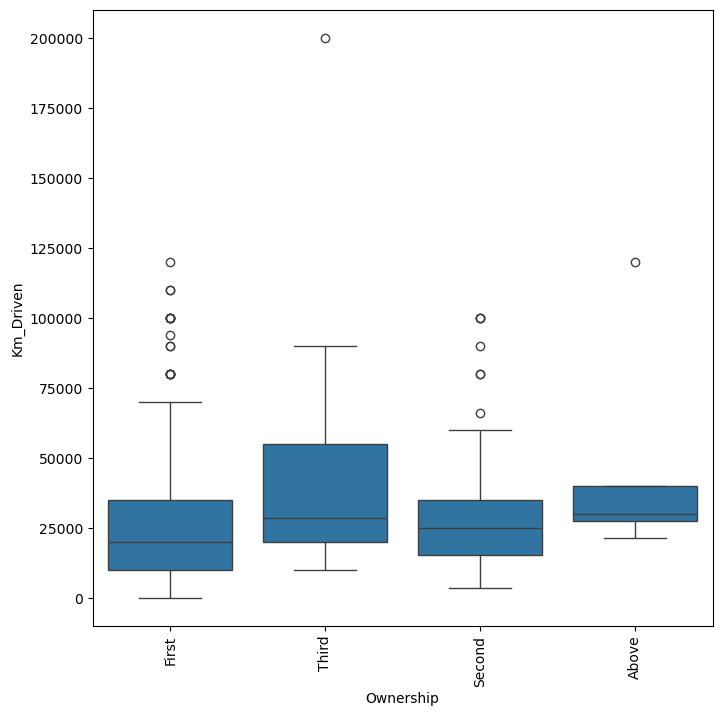

In [19]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df["Km_Driven"],x=df["Ownership"])
plt.xticks(rotation = 90)
plt.show()

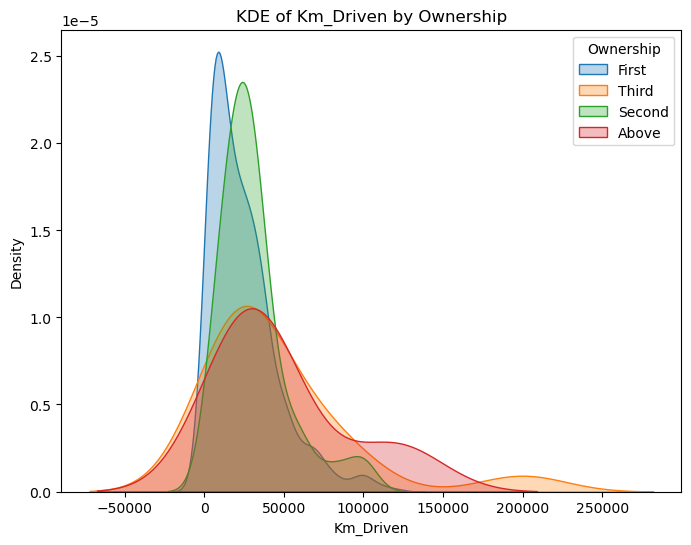

In [20]:
plt.figure(figsize=(8,6))

# Loop through each ownership category and plot its KDE
for ownership in df['Ownership'].unique():
    subset = df[df['Ownership'] == ownership]
    sns.kdeplot(subset['Km_Driven'], label=ownership, fill=True, alpha=0.3)

plt.xlabel("Km_Driven")
plt.ylabel("Density")
plt.title("KDE of Km_Driven by Ownership")
plt.legend(title="Ownership")
plt.show()


In [22]:
df.groupby('Ownership')['Km_Driven'].describe()

,count,mean,std,min,25%,50%,75%,max
Ownership,,,,,,,,
Above,5.0,47800.000000,40909.351009,21500.0,27500.0,30000.0,40000.0,120000.0
First,529.0,24547.701323,21339.511966,273.0,10000.0,20000.0,35000.0,120000.0
Second,86.0,30857.267442,21742.403293,3900.0,15500.0,25000.0,35000.0,100000.0
Third,16.0,46093.750000,47652.988276,10000.0,20000.0,28750.0,55000.0,200000.0


### Location - Km_Driven

### Insights

**High-usage cities:**

- Locations like Delhi, Hyderabad, Pune, Bangalore, Gurgaon show higher median and wider spread of Km Driven → indicates bikes are used heavily for commuting, possibly due to urban lifestyle and long travel distances.

**Outliers present:**

- Some cities (like Delhi, Ahmedabad, Bangalore) have outliers beyond 1,00,000 – 2,00,000 km, suggesting commercial use or long-distance commuting.

**Low-usage cities:**

- Smaller cities such as Ajmer, Bareilly, Ranchi, Gwalior, Asansol show lower medians and tighter ranges (around 15k–30k km) → indicates bikes are used less intensively, maybe short-distance or rural commute.

**Variation across regions:**

- Metro cities = high variability in usage.
- Tier-2/Tier-3 cities = more consistent (narrow boxes), suggesting similar riding habits in those regions.

**EV/urban adoption hint:**

- Some cities show very low km (5k–10k median), likely because electric scooters or newer vehicles dominate recent sales there.

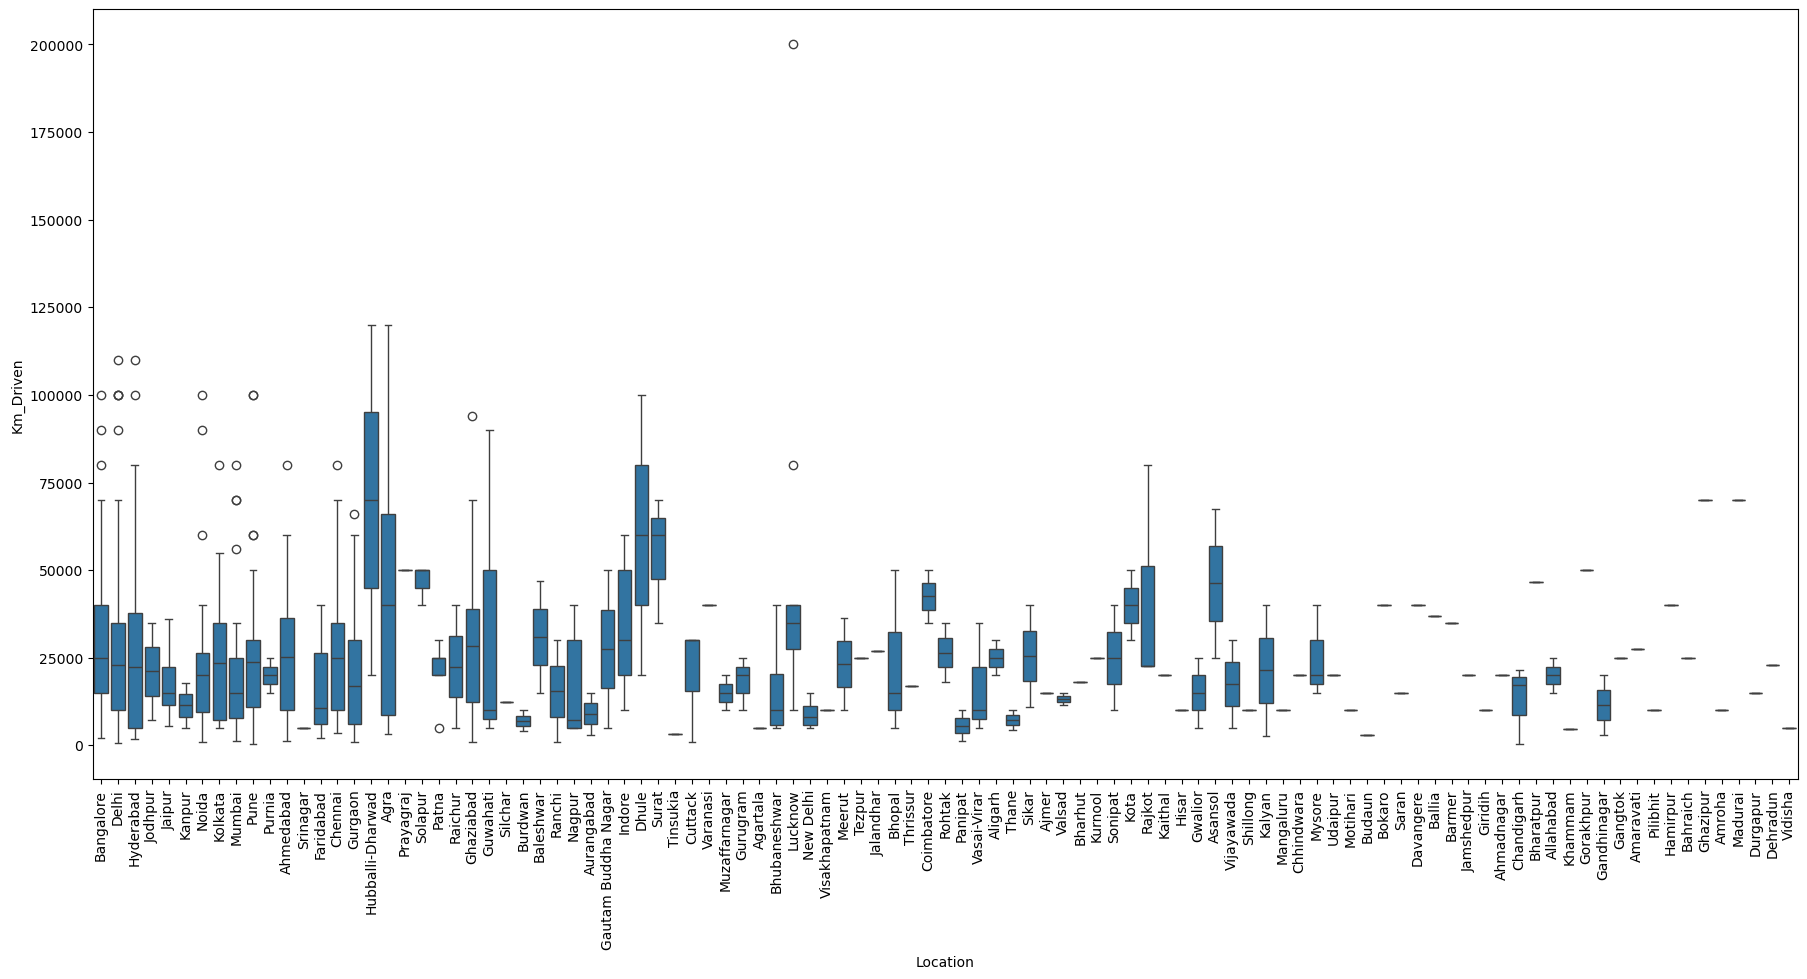

In [24]:
plt.figure(figsize=(22,10))
sns.boxplot(y=df["Km_Driven"],x=df["Location"])
plt.xticks(rotation = 90)
plt.show()

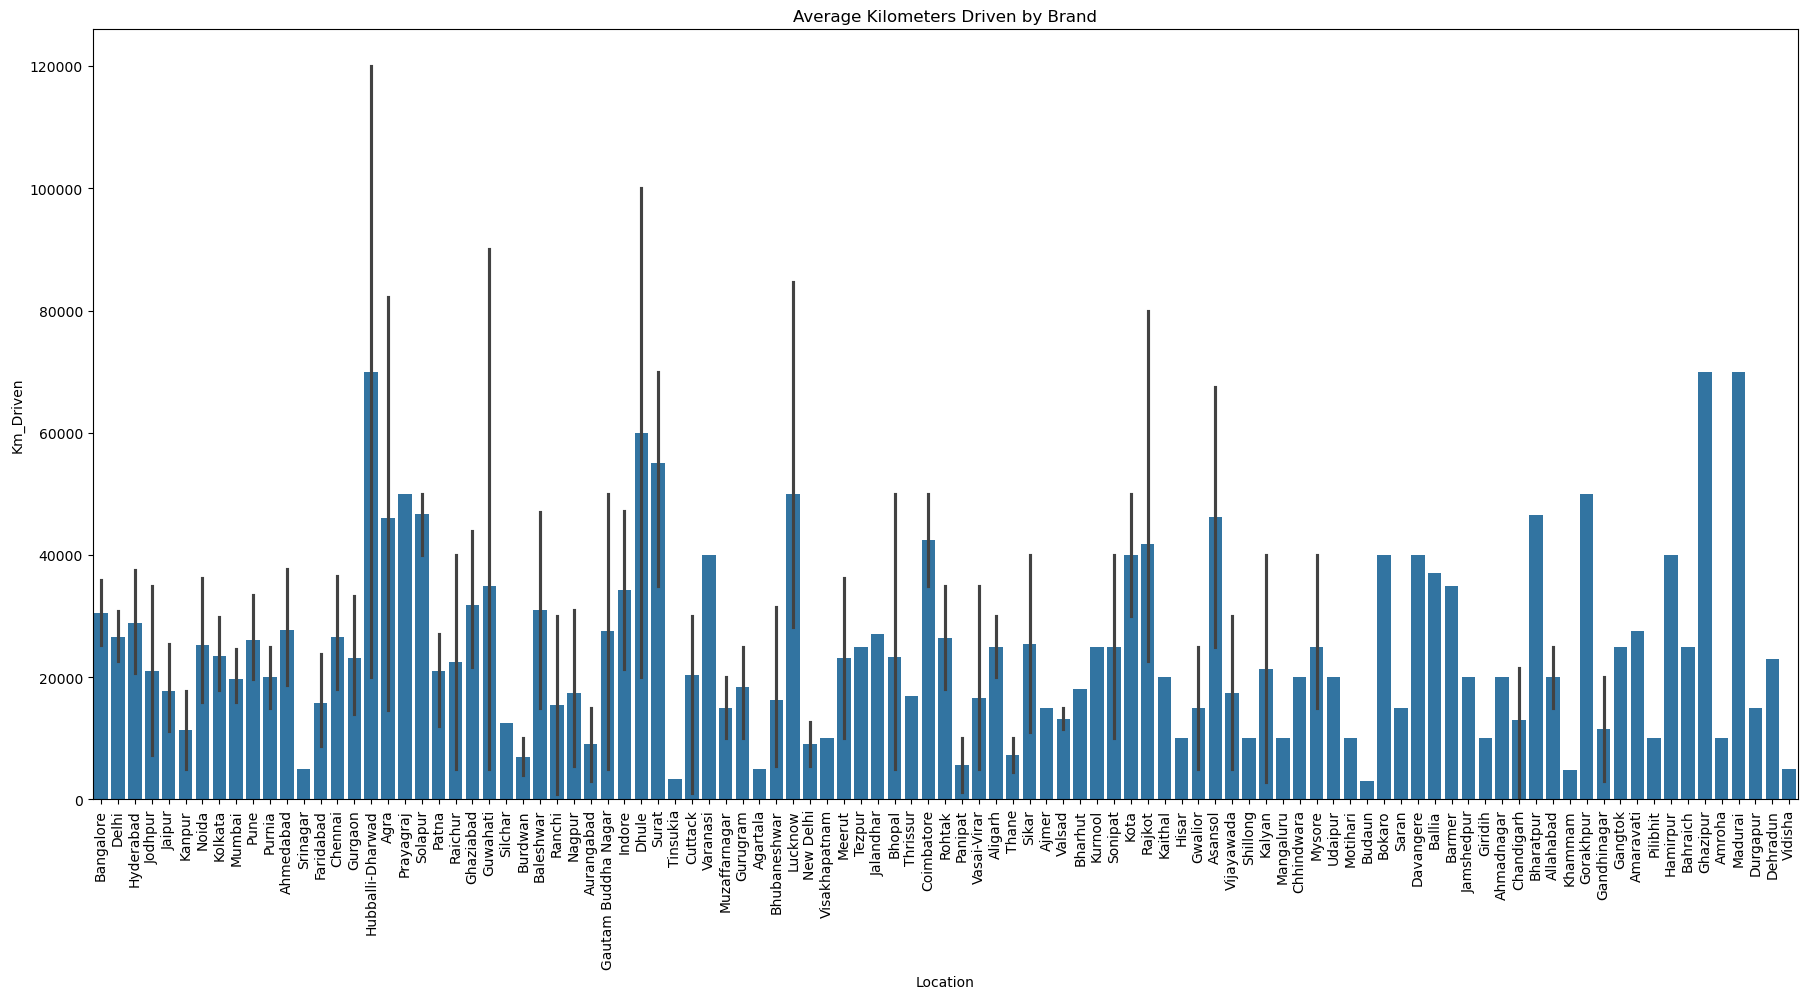

In [25]:
plt.figure(figsize=(22,10))
sns.barplot(x=df['Location'],y=df['Km_Driven'],estimator=np.mean)
plt.xticks(rotation = 90)
plt.title("Average Kilometers Driven by Brand")
plt.show()

In [26]:
df.groupby('Location')['Km_Driven'].describe()

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Agartala,1.0,5000.000000,NaN,5000.0,5000.0,5000.0,5000.0,5000.0
Agra,6.0,46056.833333,45459.368453,3341.0,8750.0,40000.0,66000.0,120000.0
Ahmadnagar,1.0,20000.000000,NaN,20000.0,20000.0,20000.0,20000.0,20000.0
Ahmedabad,16.0,27807.437500,20984.082831,1350.0,10000.0,25301.0,36250.0,80000.0
Ajmer,1.0,15000.000000,NaN,15000.0,15000.0,15000.0,15000.0,15000.0
...,...,...,...,...,...,...,...,...
Varanasi,1.0,40000.000000,NaN,40000.0,40000.0,40000.0,40000.0,40000.0
Vasai-Virar,3.0,16666.666667,16072.751268,5000.0,7500.0,10000.0,22500.0,35000.0
Vidisha,1.0,5000.000000,NaN,5000.0,5000.0,5000.0,5000.0,5000.0


### Multivariate analysis

**Insights from Model vs Ownership vs Price & Km_Driven**

- First Ownership Premium – Across almost all models, First-owner bikes command the highest average price while maintaining lower average kilometers. Buyers clearly value lower ownership transfers.
- Second/Third Ownership Discount – Prices drop significantly for second/third-owner bikes (e.g., Royal Enfield Classic 350 or Pulsar models), even when their running is not extremely high. Ownership history is a strong price determinant.
- Heavy Outliers in Km_Driven – Some second/third-owner scooters like Access 125 Drum CBS (200,000 km), Splendor Plus i3s (90,000 km), and Honda CD Dawn (100,000 km) reflect extreme running, pulling averages upward.
- Premium Bikes Hold Value – High-end models (e.g., Interceptor 650, Ninja 300, Himalayan) show relatively lower running (5,000–15,000 km) and still resell at high prices, indicating stronger demand and slower depreciation.
- Scooters vs Motorcycles – Scooters (Activa, Jupiter, Access, Dio) generally clock lower kilometers (15k–40k) and sell at lower average prices compared to motorcycles. This shows scooters are used more for short city commutes and replaced sooner.
- New Launches & Special Editions – Newer bikes (e.g., XBlade BS4, Xpulse 200 4V, Glamour Xtec, Xoom 110) have very low kilometers (below 5,000 km) and higher resale value, showing quick resale turnover for fresh launches.

**Insights from Price vs Registration_year & Ownership**

- First-owner bikes dominate across all years with relatively stable and reasonable resale prices, while second/third-owner bikes show higher variation and occasional extreme outliers (e.g., ₹4.7L in 2019).
- Resale values rise sharply after 2020, with first-owner bikes crossing ₹1L+ consistently, reflecting higher demand and pricing for newer models.


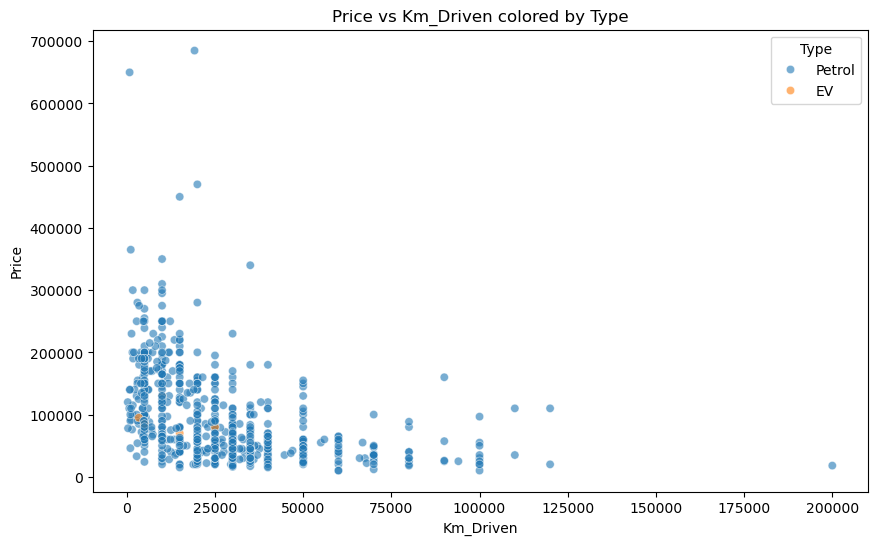

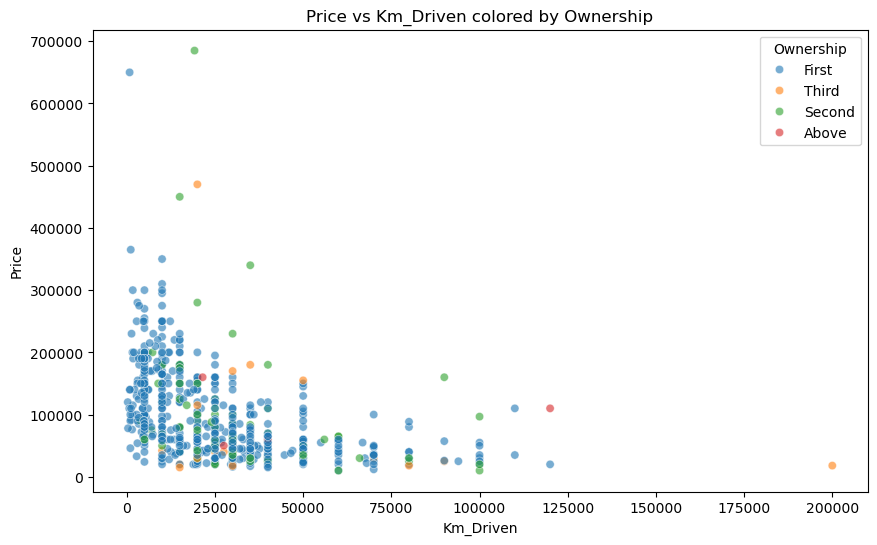

In [56]:
def scatterplot_with_cat(cat_cols):
    for col in cat_cols:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='Km_Driven', y='Price', hue=col, data=df, alpha=0.6)
        plt.title(f"Price vs Km_Driven colored by {col}")
        plt.show()

# Example usage: pass list of categorical columns
categorical_cols = ['Type', 'Ownership']  # update as per your df
scatterplot_with_cat(categorical_cols)


In [58]:
g = df.groupby(['Model','Ownership'])

In [70]:
g[['Price','Km_Driven']].agg('mean')

Price  \
Model                                              Ownership                  
 Bullet 350 ES ABS BS4                             Above      110000.000000   
                                                   First      135000.000000   
 Bullet 350 Electric Start BS4                     First      145000.000000   
                                                   Second      85000.000000   
 Bullet 350 X Electric Start                       First      187000.000000   
 Bullet 350 X Kick Start                           First      134000.000000   
 Bullet Electra std                                First      111250.000000   
                                                   Second      90000.000000   
 Classic 350 (2012-2021) ABS BS4                   First      107000.000000   
 Classic 350 (2012-2021) Pure Black BS6 January... First      165000.000000   
 Classic 350 (2012-2021) Redditch BS4              Second     115000.000000   
 Classic 350 (2012-2021) STD BS3                   First      120000.000000   
 Classic 350 (2012-2021) Stealth Black BS6 2020    First      175000.000000   
 Classic 350 Chrome Series With Dual-Channel       First      148000.000000   
 Classic 350 Dark Series With Dual-Channel         First      202000.000000   
                                                   Second     175000.000000   
                                                   Third      170000.000000   
 Classic 350 Redditch Series With Single-Channel   First      127500.000000   
                                                   Third      155000.000000   
 Classic 350 Signals Series With Dual-Channel      First      182500.000000   
 Classic 500 Stealth Black                         First      160000.000000   
 Himalayan BS4 ABS                                 First      170000.000000   
 Himalayan Granite Black                           First      250000.000000   
 Himalayan Gravel Grey                             First      200000.000000   
 Himalayan Lake Blue                               First      210000.000000   
 Himalayan Snow White                              Second      96700.000000   
                                                   Third      115000.000000   
 Hunter 350 Metro                                  First      180000.000000   
 Hunter 350 Metro Rebel                            First      164999.500000   
 Interceptor 650 Baker Express                     First      215000.000000   
 Interceptor 650 Black Ray                         First      225000.000000   
 Interceptor 650 Mark Three                        First      250000.000000   
 Interceptor 650 Orange Crush                      First      266666.666667   
 Interceptor 650 Ravishing Red                     First      270000.000000   
 Interceptor 650 Silver Spectre                    First      210000.000000   
 Meteor 350 Fireball                               First      210000.000000   
 Meteor 350 Fireball Custom                        First      200000.000000   
 Meteor 350 Stellar                                First      193333.333333   
 Meteor 350 Stellar Custom                         First      193333.333333   
 Meteor 350 Supernova                              First      180000.000000   
 Thunderbird 350 ABS                               First      105000.000000   
                                                   Second     110000.000000   
 Thunderbird 350 STD                               First       90666.666667   
 Thunderbird 350X ABS                              First      150000.000000   
 Thunderbird 350X STD                              First      111250.000000   
200 Duke                                           First      137500.000000   
200 Duke 2013 – 2016                               First       85000.000000   
                                                   Second      83500.000000   
200 Duke STD 2018 – 2020                           First      152500.000000   
250 Duke 2017-2019                       

In [12]:
temp = pd.pivot_table(
    df,
    index='Ownership',
    columns='Registration_year',
    values='Price',
    aggfunc='mean'
)


In [15]:
df_melted = temp.reset_index().melt(
    id_vars='Ownership',
    var_name='Registration_year',
    value_name='Price'
)

# drop NaNs if you want only valid values
df_melted = df_melted.dropna()
df_melted

,Ownership,Registration_year,Price
1,First,2007,16000.000000
5,First,2009,29000.000000
9,First,2010,24666.666667
10,Second,2010,17500.000000
11,Third,2010,19000.000000
12,Above,2011,50000.000000
13,First,2011,25750.000000
14,Second,2011,20000.000000
15,Third,2011,18000.000000
17,First,2012,28937.500000


# 📌 Conclusions

- Most two-wheelers in the resale market fall in the affordable segment, with only a small portion being premium bikes.

- Older vehicles tend to have higher usage and significantly lower resale value, while newer models sell quickly at higher prices.

- Vehicles that have been used extensively lose their value much faster, regardless of the brand or category.

- Units that are still with the first owner consistently sell for better prices compared to those with multiple ownership transfers.

- Commuter models dominate the resale market, while sports and premium models occupy a niche but attract enthusiasts.

- Brand reputation plays a strong role: some brands retain their value better due to popularity, demand, and trust.

- Urban markets show higher resale values compared to smaller towns, reflecting stronger demand and spending capacity.

- A few listings show unusually high or low pricing, suggesting either data quality issues or unrealistic seller expectations.

# Overall Takeaway

- The resale market is active and competitive, mainly driven by demand for reliable, low-usage, and first-owner vehicles.

- Buyers show clear preference for newer models with fewer kilometers, while older and heavily used ones are forced into lower price brackets.

- Brand, condition, and location all influence final selling price, making them the key decision factors in the market.

# Recommendations for Sellers

- Highlight good condition and proper maintenance in the listing to attract higher prices.

- If you are the first owner, make sure to mention it clearly — it adds strong value.

- Set a realistic price range by comparing with similar models in the market; avoid overpricing.

- Provide complete documents and service history, as buyers trust transparent deals more.

- Selling sooner after purchase (rather than after heavy usage) ensures a much better resale value.

# Recommendations for Buyers

- Prefer newer vehicles with low usage for long-term reliability.

- Look for single-owner bikes — they are generally better maintained and less risky.

- Don’t focus only on price; check condition, service records, and accident history.

- Negotiate strongly if the bike has very high usage or multiple previous owners.

- Consider resale potential — choose popular brands/models that will hold value in the future.